# <u>Определение перспективного тарифа для телеком-компании</u>

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег компании.
Нужно произвести предварительный анализ тарифов на небольшой выборке клиентов. Есть данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Имеется два тарифа: "Смарт" и "Ультра". Необходимо изучить выборку из 500 клиентов за 2018г и определить, <u>какой тариф приносит наибольший доход компании</u>.

<b>Примечание:</b> Секунды округляются  до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону до Гб. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. 
Неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

<div align="center"><table border="1" width="500" height="240">
			<tr>  <!-- Заголовок-->
				<td bgcolor="lightgrey">Тариф</td>
				<td bgcolor="lightskyblue">Смарт</td>
				<td bgcolor="lightgreen">Ультра</td>
			</tr>
			<tr>  <!-- Строка 1 a1 b1 c1-->
				<td>Ежемесечная плата, руб</td>
				<td>550</td>
				<td>1950</td>
			</tr>
			<tr>
				<td>Разговор, мин</td>
				<td>500</td>
				<td>3000</td>
			</tr>
            <tr>
				<td>СМС, шт</td>
				<td>50</td>
				<td>1000</td>
			</tr>
            <tr>
				<td>Интернет, Гб</td>
				<td>15</td>
				<td>30</td>
			</tr>
            <tr>
				<td>Доп. разговор, руб/мин</td>
				<td>3</td>
				<td>1</td>
			</tr>
            <tr>
				<td>Доп. СМС, руб/шт</td>
				<td>3</td>
				<td>1</td>
			</tr>
            <tr>
				<td>Доп. интернет, руб/Гб</td>
				<td>200</td>
				<td>150</td>
			</tr>
		</table>

## <u>Цели исследования

<b>1) Проанализировать поведение пользователей:</b>
* Сколько звонков делают пользователи за месяц
* Сколько минут тратят пользователи за месяц
* Сколько сообщений отправляют пользователи за месяц
* Какой объем интернет трафика используют пользователи за месяц
* Определить сколько минут, сообщений и трафика требуется пользователям для каждого тарифа в месяц

<b>2) Определить какая выручка с каждого пользователя в месяц</b>

<b>3) Проверить гипотезы:</b>

* Средняя выручка с пользователей между тарифами «Ультра» и «Смарт» различаются
* Средняя выручка с пользователей в Москве отличаются от средней выручки пользователей из других регионов

<b>4) Определить какой тариф приносит наибольший доход компании</b>

## <u><a id="0"></a>Этапы исследования

* [1) Загрузить и ознакомиться с данными](#1)
* [2) Подготовка данных](#2)
* [3) Исследовательский анализ данных](#3)
    *  [3.1) Звонки](#3.1)
    *  [3.2) Сообщения](#3.2)
    *  [3.3) Интернет](#3.3)
    *  [3.4) Выручка](#3.4)
    *  [3.5) Сравнение тарифов](#3.5)
* [4) Проверка гипотез](#4)
* [5) Вывод](#5)

## <u>1) Загрузка и ознакомление с данными<a id="1"></a>
<font size="2">([к содержанию](#0))</font><br/>

### Предоставленные данные и их описание

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats as st

months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

In [2]:
users = pd.read_csv('users.csv')
calls = pd.read_csv('calls.csv')
messages = pd.read_csv('messages.csv')
internet = pd.read_csv('internet.csv')
tariffs = pd.read_csv('tariffs.csv')

#### Таблица users (информация о пользователях)
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

In [3]:
users
# `churn_date` — дата прекращения пользования тарифом
# (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


#### Таблица calls (информация о звонках)
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

In [4]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


#### Таблица messages (информация о сообщениях)
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

In [5]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


#### Таблица internet (информация об интернет-сессиях)
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

In [6]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


#### Таблица tariffs (информация о тарифах)
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [7]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## <u>2) Подготовка данных<a id="2"></a>
<font size="2">([к содержанию](#0))</font><br/>

Проверим корректность данных. Необходимо:
 
* привести формат даты во всех таблицах к datetime и оставить только номер месяца
* изучить значения всех таблиц на наличие дубликатов, отсутствующих данных и адекватность их значений (например, корректный возраст абонента)
* в таблице `calls` округлить `duration` в большую сторону до целого значения минут
* в таблице `internet` удалить столбец `Unnamed: 0`
* в таблицах `calls` и `internet` необходимо удалить звонки нулевой длительности интернет сессии нулевого объёма, так как это несостоявшиеся звонки и сессии, которые не используются для рассчёта выручки и могут некоректно отразиться при дальнейших рассчётах показателей абонентов

### <u>2.1) Формат даты

Конвертируем тип даты в `datetime` и оставляем только номер месяца:

In [8]:
users['month'] = pd.to_datetime(users['reg_date']).dt.month
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
internet['month'] = pd.to_datetime(internet['session_date']).dt.month

### <u>2.2) Таблица users

In [9]:
# Число пропусков в данных
print("Пропуски в данных (NaN, None, NaT) [кроме 'churn_date']:", users[['user_id', 'age', 'city', 'first_name', 'last_name', 'reg_date', 'tariff']].isnull().sum().sum())

# Число дубликатов
print('Дубликаты строк:', users.duplicated().sum())
print("Неуникальные (повторяющиеся) 'user_id':", len(users[users.duplicated(['user_id'])]))
full_name = pd.DataFrame({'user_id': users['user_id'], 'full_name': users['first_name'] + ' ' + users['last_name']})
print('Полных тёзок:', full_name.duplicated().sum())

# Адекватность данных
print('Абонентов младше 5 лет и старше 95 лет:', len(users[(users['age'] < 5) & (users['age'] > 95)]))

Пропуски в данных (NaN, None, NaT) [кроме 'churn_date']: 0
Дубликаты строк: 0
Неуникальные (повторяющиеся) 'user_id': 0
Полных тёзок: 0
Абонентов младше 5 лет и старше 95 лет: 0


### <u>2.3) Таблица calls

In [10]:
# Число пропусков в данных
print('Пропуски в данных (NaN, None, NaT):', calls['duration'].isna().sum())

# Округлить длительность звонка до минут в большую сторону
calls['duration'] = np.ceil(calls['duration']).astype('int')

# Звонки нулевой длительности [несостоявшиеся звонки]
print('Кол-во звонков нулевой длительности:', len(calls[calls['duration'] == 0]))  # calls.query('duration == 0.0')
y = len(calls[calls['duration'] == 0])/len(calls['duration'])
print('Доля звонков нулевой длительности:', f'{(round(100*y, 1))} %')

Пропуски в данных (NaN, None, NaT): 0
Кол-во звонков нулевой длительности: 39613
Доля звонков нулевой длительности: 19.6 %


<Axes: ylabel='Frequency'>

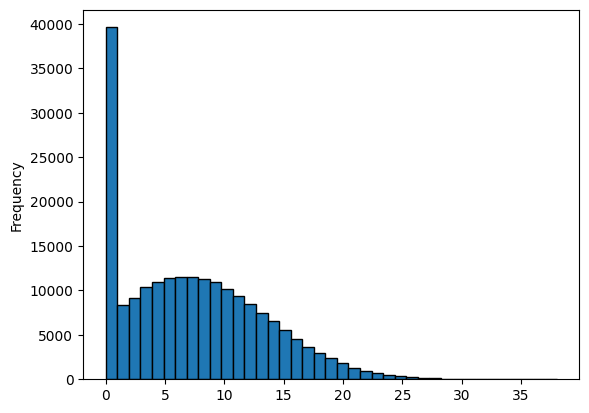

In [11]:
calls['duration'].plot(kind='hist', ec='black', bins=39)

In [12]:
# Убрать звонки нулевой длительности т.к. они не расходуют лимиты минут
# и вообще не принимают участия в формировании конечной выручки
calls = calls[calls['duration'] != 0]

### <u>2.4) Таблица internet

Не округлять отдельные сессии internet - округлять Мб в Гб по результатам месяца

In [13]:
# Число пропусков в данных
print('Пропуски в данных (NaN, None, NaT):', internet['mb_used'].isna().sum())

# Сессии нулевого объёма [интернет подключался, но абонент ничего не скачивал]
print('Кол-во интернет сессий нулевого объёма:', len(internet[internet['mb_used'] == 0]))
y = len(internet[internet['mb_used'] == 0])/len(internet['mb_used'])
print('Доля интернет сессий нулевого объёма:', f'{(round(100*y, 1))} %')

Пропуски в данных (NaN, None, NaT): 0
Кол-во интернет сессий нулевого объёма: 19598
Доля интернет сессий нулевого объёма: 13.1 %


<Axes: ylabel='Frequency'>

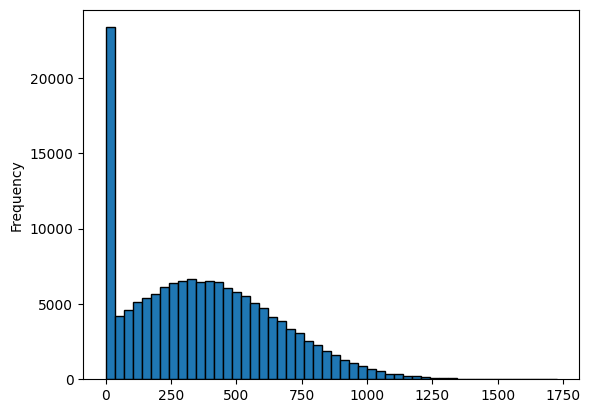

In [14]:
internet['mb_used'].plot(kind='hist', ec='black', bins=50)

In [15]:
# Удалить сессии нулевого объёма т.к. они не расходуют лимиты
# и вообще не принимают участия в формировании конечной выручки
internet = internet[internet['mb_used'] != 0]

In [16]:
# Удалить столбец 'Unnamed: 0'
internet.drop('Unnamed: 0', axis=1, inplace=True)

### <u>2.5) Таблица messages

In [17]:
# Пустые строки
print('Пустые строки:', messages.isna().sum().sum())

Пустые строки: 0


# <u>3) Исследовательский анализ данных<a id="3"></a>
<font size="2">([к содержанию](#0))</font><br/>

Цель исследования - определить:
* 1) Сколько <b>мин, СМС, Гб</b> используют абоненты каждого тарифа и сколько им их не хватает
* 2) Какая <b>выручка</b> с пользователей каждого тарифа

*  [3.1) Звонки](#3.1)
*  [3.2) Сообщения](#3.2)
*  [3.3) Интернет](#3.3)
*  [3.4) Выручка](#3.4)
*  [3.5) Сравнение тарифов](#3.5)

## <u>3.1) Звонки<a id="3.1"></a>
<font size="2">([см. Вывод по звонкам](#Вывод_по_звонкам))</font><br/>

#### <u>Продолжительность звонков</u>

In [18]:
users_calls = users[['user_id', 'tariff']].merge(calls[['user_id', 'month', 'duration']], how='inner', on='user_id')
users_calls.head()

,user_id,tariff,month,duration
0,1000,ultra,6,3
1,1000,ultra,9,14
2,1000,ultra,12,6
3,1000,ultra,8,19
4,1000,ultra,9,19


In [19]:
# Суммарная продолжительность звонков клиентов smart по месяцам
sm_durr = users_calls[users_calls['tariff'] == 'smart']
sm_dur = sm_durr.groupby('month', as_index=False).agg({'duration': 'sum'})
sm_dur.head()

,month,duration
0,1,6931
1,2,17324
2,3,30034
3,4,41119
4,5,54618


In [20]:
# Суммарная продолжительность звонков клиентов ultra по месяцам
ul_durr = users_calls[users_calls['tariff'] == 'ultra']
ul_dur = ul_durr.groupby('month', as_index=False).agg({'duration': 'sum'})
ul_dur.head()

,month,duration
0,1,3853
1,2,7131
2,3,18117
3,4,25191
4,5,34192


In [21]:
y_dur = (sm_dur['duration'].sum() - ul_dur['duration'].sum())*100/sm_dur['duration'].sum()
print(f"Суммарная годовая продолжительность звонков 'smart' на {y_dur:.0f} % больше 'ultra'")

Суммарная годовая продолжительность звонков 'smart' на 44 % больше 'ultra'


#### Ежемесячная и годовая продолжительность звонков

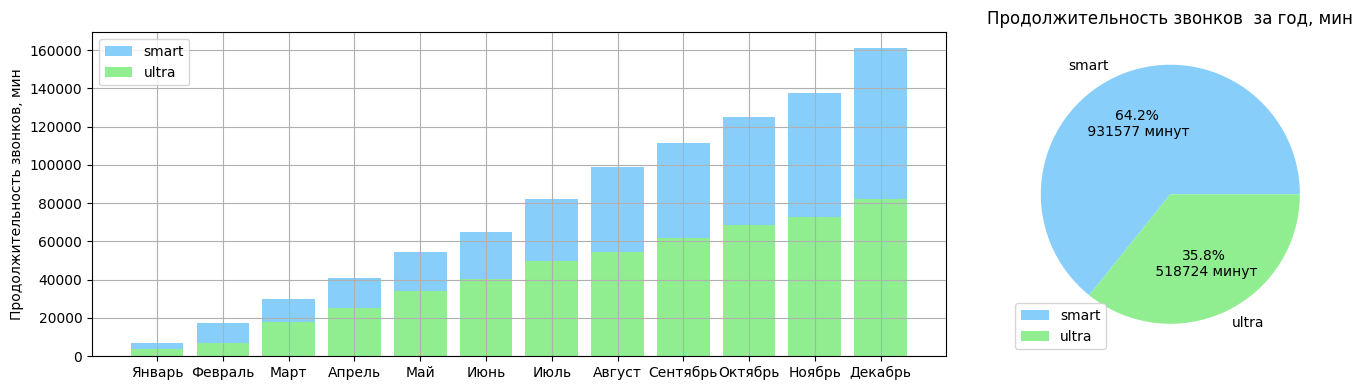

In [22]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

ax1.bar(months, sm_dur['duration'], label='smart', color='lightskyblue')
ax1.bar(months, ul_dur['duration'], label='ultra', color='lightgreen')
ax1.set_ylabel('Продолжительность звонков, мин', fontsize=10)
ax1.grid(), ax1.legend()

values = [sm_dur['duration'].sum(), ul_dur['duration'].sum()] 
ax2.pie(values, labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} минут')
ax2.set_title('Продолжительность звонков  за год, мин'), ax2.legend()
plt.show()

Суммарная продолжительность звонков ежемесячно растёт для обоих тарифов.
Абоненты тарифа `smart` расходуют больше минут, чем абоненты тарифа `ultra`.

Изучим с чем это связано: 
* 1) с бОльшим числом активных абонентов 
* 2) с бОльшей продолжительностью отдельных звонков 
* 3) с бОльшим частотой звонков

#### <u>Число активных абонентов
Изучим, связан ли бОльший расход минут абонентов `smart` с бОльшим числом активных пользователей

In [23]:
# Число активных абонентов (людей, которые вообще звонили)
sm_call_act = users_calls[users_calls['tariff'] == 'smart']
sm_call_act_Y = sm_call_act['user_id'].nunique()
sm_call_act = sm_call_act[['month', 'user_id']].groupby('month', as_index=False).nunique().rename(columns={'user_id': 'user_count'})


ul_call_act = users_calls[users_calls['tariff'] == 'ultra']
ul_call_act_Y = ul_call_act['user_id'].nunique()
ul_call_act = ul_call_act[['month', 'user_id']].groupby('month', as_index=False).nunique().rename(columns={'user_id': 'user_count'})

In [24]:
y_act = (sm_call_act_Y - ul_call_act_Y)*100/sm_call_act_Y
print(f"Число активных абонентов 'smart' на {y_act:.0f} % больше 'ultra'")

Число активных абонентов 'smart' на 59 % больше 'ultra'


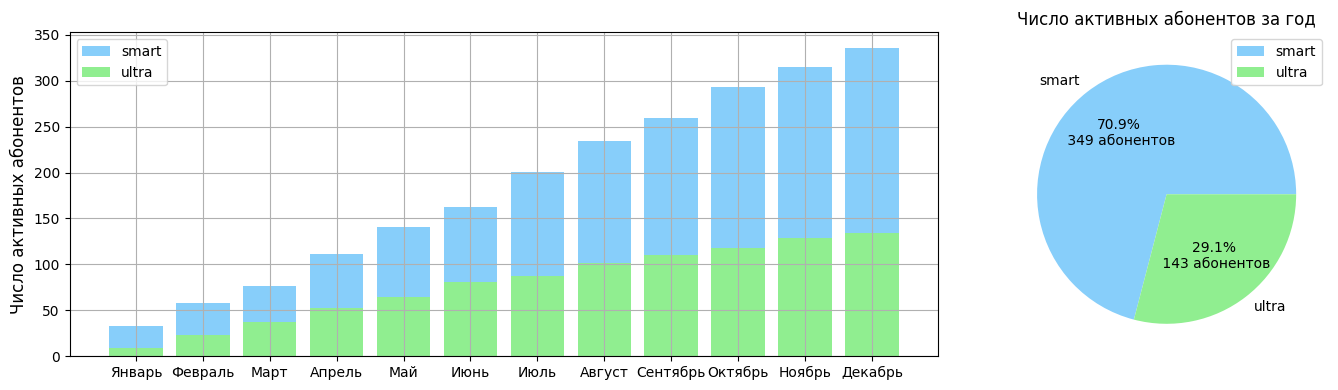

In [25]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

ax1.bar(months, sm_call_act['user_count'], label='smart', color='lightskyblue')
ax1.bar(months, ul_call_act['user_count'], label='ultra', color='lightgreen')
ax1.set_ylabel('Число активных абонентов', fontsize=12)
ax1.grid(), ax1.legend()

values = [sm_call_act_Y, ul_call_act_Y] 
ax2.pie(values, labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} абонентов')
ax2.set_title('Число активных абонентов за год'), ax2.legend()
plt.show()

Число активных абонентов обоих тарифов ежемесячно растёт. Число активных абонентов тарифа `smart` больше, чем у тарифа `ultra`. Это напрямую влияет на рост суммарной продолжительности звонков.

Посчитаем среднюю ежемесячную продолжительность звонков (отношение суммарного  потребление минут всеми абонентами за месяц к числу активных абонентов) - <b>этот параметр можно сравнивать с лимитом тарифов</b>.

#### <u>Средняя ежемесячная продолжительность звонков
Средняя ежемесячная продолжительность звонков показывает укладываются ли в среднем абоненты в лимиты тарифов.

In [26]:
# Среднее ежемесячное постребление минут
sm_dur_per_act = sm_dur.merge(sm_call_act, how='inner', on='month')
sm_dur_per_act['dur_per_act'] = sm_dur_per_act['duration']/sm_dur_per_act['user_count']

ul_dur_per_act = ul_dur.merge(ul_call_act, how='inner', on='month')
ul_dur_per_act['dur_per_act'] = ul_dur_per_act['duration']/ul_dur_per_act['user_count']

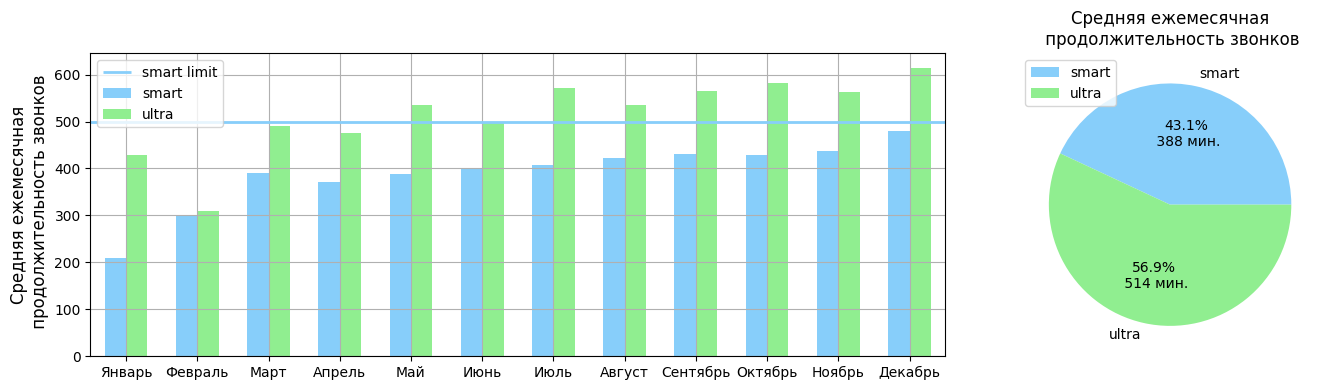

In [27]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

x = np.arange(len(months))
w = 0.3
bar1 = ax1.bar(x - w/2, sm_dur_per_act['dur_per_act'], w, label='smart', color='lightskyblue')
bar2 = ax1.bar(x + w/2, ul_dur_per_act['dur_per_act'], w, label='ultra', color='lightgreen')
ax1.hlines(500, -0.5, 11.5, linewidth=2, color='lightskyblue', label='smart limit')  # y, x1, x2
#ax1.hlines(3000, -0.5, 11.5, linewidth=2, color='lightgreen', label='ultra limit')  # y, x1, x2
ax1.set_xlim(left=-0.5, right=11.5)
ax1.set_ylabel('Средняя ежемесячная\n продолжительность звонков', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(months)
ax1.grid(), ax1.legend()

values = [sm_dur_per_act['dur_per_act'].mean(), ul_dur_per_act['dur_per_act'].mean()] 
ax2.pie(values, labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} мин.')
ax2.set_title('Средняя ежемесячная\n продолжительность звонков'), ax2.legend()
plt.show()

In [28]:
users_calls[users_calls['tariff'] == 'smart'].groupby('user_id', as_index=False).agg({'duration': 'mean'})
sm_calls = users_calls[users_calls['tariff'] == 'smart'].drop('tariff', axis=1)
ul_calls = users_calls[users_calls['tariff'] == 'ultra'].drop('tariff', axis=1)

In [29]:
## Средняя ежемесячная продолжительность звонков SMART
sm_dur_m_mean = pd.DataFrame()
for i in range(0, 12):
    temp = sm_calls[sm_calls['month'] == i+1].groupby('user_id', as_index=False).agg({'duration': 'sum'})
    temp['month'] = i+1
    sm_dur_m_mean = pd.concat([sm_dur_m_mean, temp], axis=0)
    sm_dur_m_mean = sm_dur_m_mean.groupby('user_id', as_index=False).agg({'duration': 'mean'})

In [30]:
## Средняя ежемесячная продолжительность звонков ULTRA
ul_dur_m_mean = pd.DataFrame()
for i in range(0, 12):
    temp = ul_calls[ul_calls['month'] == i+1].groupby('user_id', as_index=False).agg({'duration': 'sum'})
    temp['month'] = i+1
    ul_dur_m_mean = pd.concat([ul_dur_m_mean, temp], axis=0)
    ul_dur_m_mean = ul_dur_m_mean.groupby('user_id', as_index=False).agg({'duration': 'mean'})

In [31]:
# СКО
sm_dur_std = np.std(sm_dur_m_mean['duration'])
ul_dur_std = np.std(ul_dur_m_mean['duration'])
print(f'СКО средней ежемесячной продолжительности звонков тарифа `smart`: {sm_dur_std:.0f}')
print(f'СКО средней ежемесячной продолжительности звонков тарифа `ultra`: {ul_dur_std:.0f}')

СКО средней ежемесячной продолжительности звонков тарифа `smart`: 159
СКО средней ежемесячной продолжительности звонков тарифа `ultra`: 284


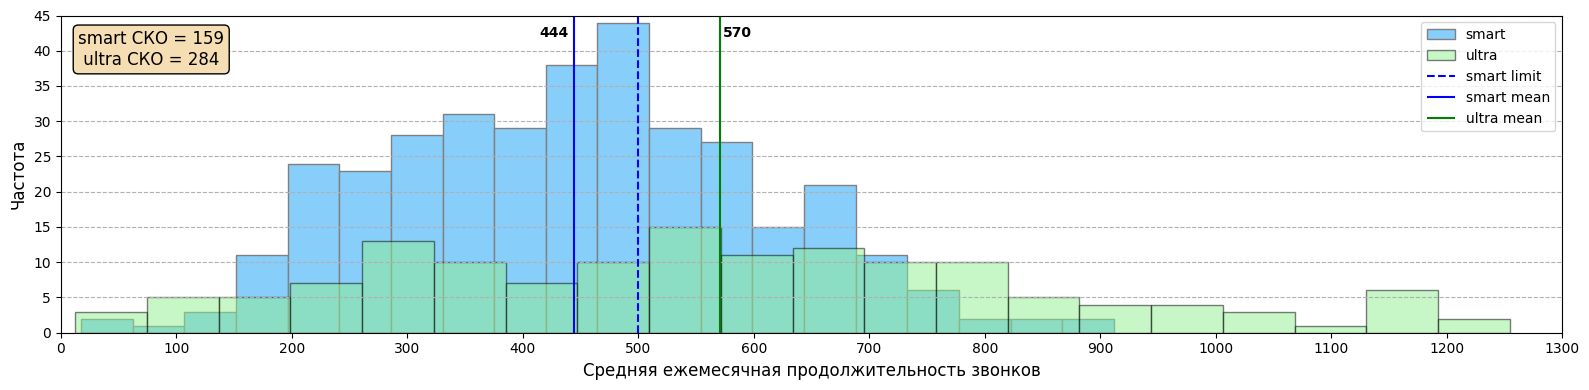

In [32]:
fig, ax = plt.subplots(figsize=[16, 4], tight_layout=True)


ax.hist(sm_dur_m_mean['duration'], bins=20, ec='gray', color='lightskyblue', label='smart') # bins=10, range, color
ax.hist(ul_dur_m_mean['duration'], bins=20, ec='black', color='lightgreen', label='ultra', alpha=0.5) # bins=10, range, color

ax.set_xticks(np.arange(0, 1301, 100))  # labels=[], minor=False
ax.set_ylim(0, 45)
ax.set_xlim(0, 1300)
ax.vlines(500, 0, 45, label='smart limit', color='blue', linestyle='dashed')

sm_mean = sm_dur_m_mean['duration'].mean()
ul_mean = ul_dur_m_mean['duration'].mean()

ax.vlines(sm_mean, 0, 45, label='smart mean', color='blue')
ax.text(sm_mean-30, 42, s=f'{sm_mean:.0f}', fontweight='bold')  # x, y

ax.vlines(ul_dur_m_mean['duration'].mean(), 0, 45, label='ultra mean', color='green')
ax.text(ul_mean+3, 42, s=f'{ul_mean:.0f}', fontweight='bold')  # x, y

ax.grid(axis='y', linestyle='dashed')  # which='both'/'major', axis='both'/'x', color, linestyle, linewidh
ax.legend()
ax.set_ylabel('Частота', fontsize=12)
ax.set_xlabel('Средняя ежемесячная продолжительность звонков', fontsize=12)
ax.text(15, 38, s=f'smart СКО = {sm_dur_std:.0f}\n ultra СКО = {ul_dur_std:.0f}',
        color='black', fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat'))  # x, y
plt.show()

СКО средней ежемесячной продолжительности звонков тарифа `smart` существенно меньше, чем у `ultra`. Средняя ежемесячная продолжительность звонков тарифа `smart`распределена более "скученно" вокруг лимита в 500 мин/мес, что означает, что абоненты абоненты тарифа `smart` пытаются израсходовать свой пакет минут как можно эффективнее, приближаясь к значению своего лимита.

Средняя ежемесячная продолжительность звонков почти не меняется от месяца к месяцу. Следовательно, бОльший суммарных расход минут абонентов `smart` связан с большим числом самих абонентов, и не связан с продолжительностью звонков отдельных абонентов.

Более того, среднее потребление минут ежемесячно больше на тарифе `ultra`. Следовательно, каждый абонент тарифа `smart` тратит в среднем даже меньше минут, чем абонент `ultra`.

#### <u>Продолжительность отдельных звонков
Изучим, связан ли бОльший расход минут абонентов `smart` с бОльшей продолжительностью ОТДЕЛЬНЫХ звонков пользователей 

In [33]:
# Средняя продолжительность звонков клиентов smart по месяцам
sm_dur_mean = users_calls[users_calls['tariff'] == 'smart']
sm_dur_mean = sm_dur_mean.groupby('month', as_index=False).agg({'duration': 'mean'})

In [34]:
# Средняя продолжительность звонков клиентов ultra по месяцам
ul_dur_mean = users_calls[users_calls['tariff'] == 'ultra']
ul_dur_mean = ul_dur_mean.groupby('month', as_index=False).agg({'duration': 'mean'})

(None, <matplotlib.legend.Legend at 0x216b3a35c40>)

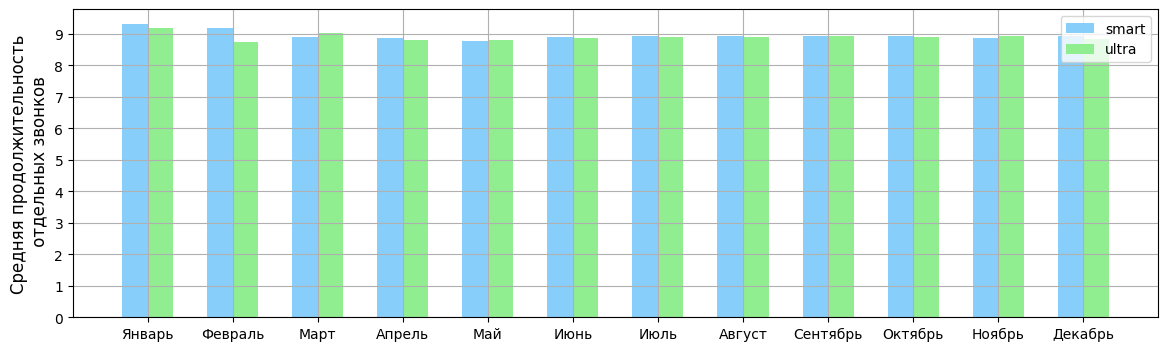

In [35]:
fig, ax = plt.subplots(figsize=[14, 4])
x = np.arange(len(months))
w = 0.3
ax.bar(x - w/2, sm_dur_mean['duration'], w, label='smart', color='lightskyblue')
ax.bar(x + w/2, ul_dur_mean['duration'], w, label='ultra', color='lightgreen')
ax.set_ylabel('Средняя продолжительность\n отдельных звонков', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.set_yticks(np.arange(0, 10))  # labels=[], minor=False
ax.grid(), ax.legend()

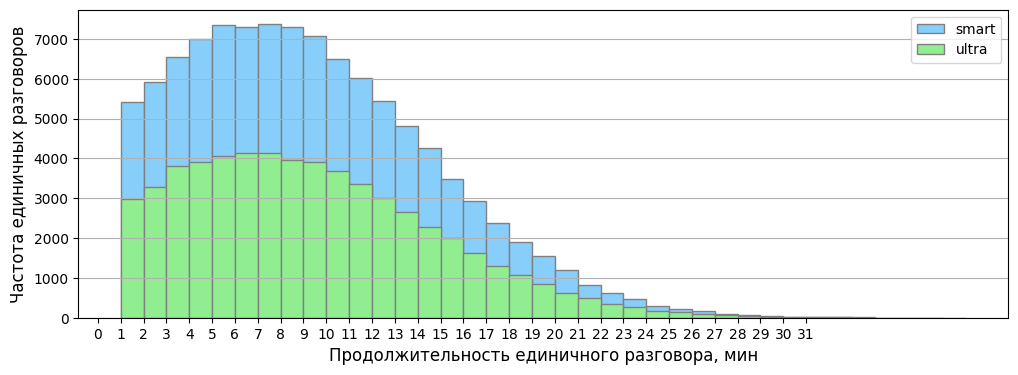

In [36]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
sm = users_calls[users_calls['tariff'] == 'smart']['duration']
ul = users_calls[users_calls['tariff'] == 'ultra']['duration']
ax.hist(sm, bins=37, ec='gray', color='lightskyblue', label='smart') # bins=10, range, color
ax.hist(ul, bins=36, ec='gray', color='lightgreen', label='ultra') # bins=10, range, color
ax.set_xticks(np.arange(0, 32))  # labels=[], minor=False
ax.set_ylabel('Частота единичных разговоров', fontsize=12)
ax.set_xlabel('Продолжительность единичного разговора, мин', fontsize=12)
ax.grid(axis='y')  # which='both'/'major', axis='both'/'x', color, linestyle, linewidh
ax.legend()

Средняя продолжительность звонков одинаковая для обоих тарифов и не меняется от месяца к месяцу. Это объясняется тем, что все люди в среднем ведут себя одинаково и им требуется около 9 минут для одного разговора.

Таким образом, бОльший суммарный расход минут абонентов smart не связан с продолжительностью ОТДЕЛЬНЫХ звонков пользователей.

#### <u>Частота звонков
Изучим, связан ли бОльший расход минут абонентов `smart` с бОльшей частотой звонков пользователей. Посчитаем число отдельных звонков.

In [37]:
# Кол-во звонков клиентов smart по месяцам
sm_dur_count = users_calls[users_calls['tariff'] == 'smart']
sm_dur_count = sm_dur_count.groupby('month', as_index=False).agg({'duration': 'count'})

In [38]:
# Кол-во звонков клиентов ultra по месяцам
ul_dur_count = users_calls[users_calls['tariff'] == 'ultra']
ul_dur_count = ul_dur_count.groupby('month', as_index=False).agg({'duration': 'count'})

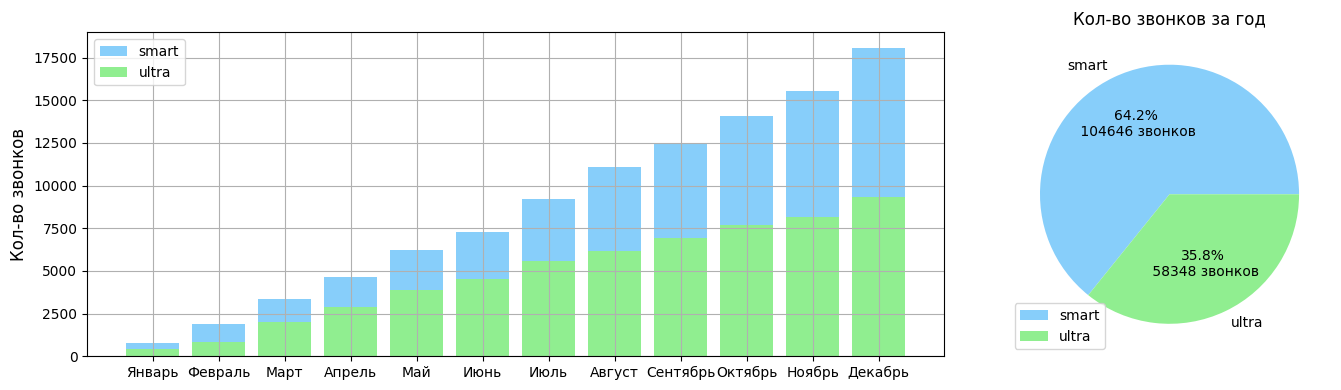

In [39]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

ax1.bar(months, sm_dur_count['duration'], label='smart', color='lightskyblue')
ax1.bar(months, ul_dur_count['duration'], label='ultra', color='lightgreen')
ax1.set_ylabel('Кол-во звонков', fontsize=12)
ax1.grid(), ax1.legend()

values = [sm_dur_count['duration'].sum(), ul_dur_count['duration'].sum()] 
ax2.pie(values, labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} звонков')
ax2.set_title('Кол-во звонков за год'), ax2.legend()
plt.show()

Суммарное число звонков ежемесячно растёт и больше для тарифа `smart`.

Найдёт среднюю частоту звонков - отношение числа звонков к числу активных абонентов.

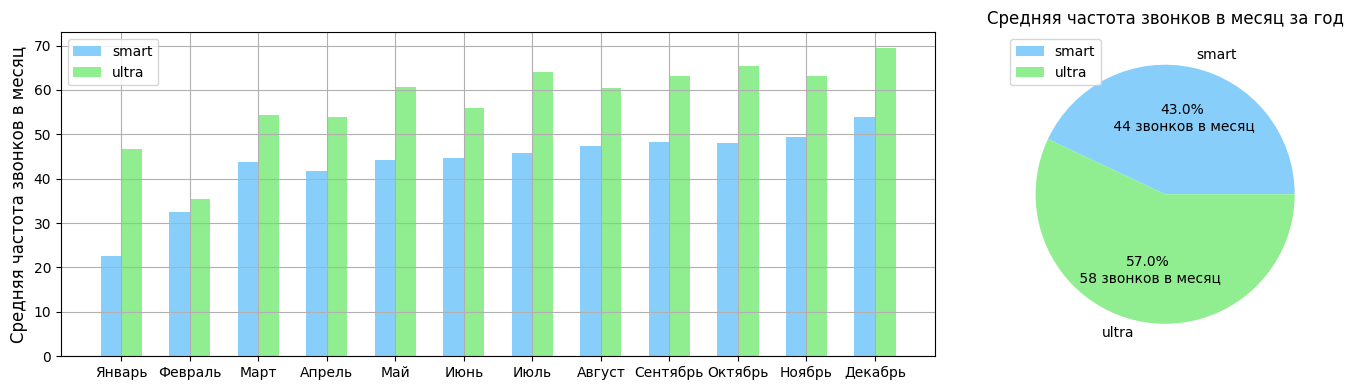

In [40]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

sm_call_freq = sm_dur_count['duration']/sm_call_act['user_count']
ul_call_freq = ul_dur_count['duration']/ul_call_act['user_count']
x = np.arange(len(months))
w = 0.3
ax1.bar(x - w/2, sm_call_freq, w, label='smart', color='lightskyblue')
ax1.bar(x + w/2, ul_call_freq, w, label='ultra', color='lightgreen')
ax1.set_xticks(x)
ax1.set_xticklabels(months)
ax1.set_ylabel('Средняя частота звонков в месяц', fontsize=12)
ax1.grid(), ax1.legend()

values = [sm_call_freq.mean(), ul_call_freq.mean()] 
ax2.pie(values, labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} звонков в месяц')
ax2.set_title('Средняя частота звонков в месяц за год'), ax2.legend()
plt.show()

Каждый абонент `smart` в среднем звонит реже, чем абонент `ultra` и средняя частота звонков ежемесячно почти не меняется, но за счёт того, что абонентов `smart` намного больше суммарное количество звонков у них получется больше, что у абонентов `ultra`.

Таким образом, бОльшее суммарное потребление минут абонентов `smart` не связано в частотой звонков.

#### <u>Корреляции с суммарной продолжительности звонков

В ходе исследования было выявленно, что суммарная продолжительность звонков растёт для обоих тарифов. Изучим с помощью корреляционного анализа с чем это связано: 
* 1) с бОльшим числом активных абонентов 
* 2) с бОльшей продолжительностью отдельных звонков 
* 3) с бОльшим частотой звонков

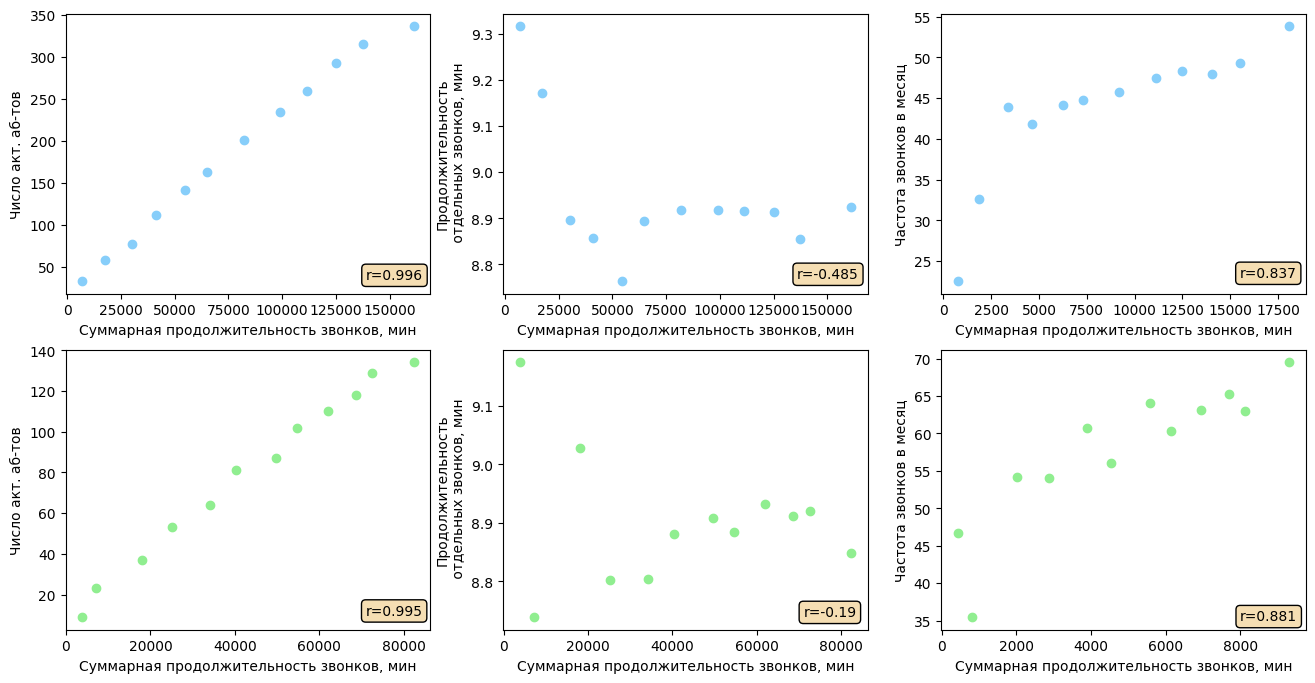

In [41]:
fig = plt.figure(figsize=[16, 8])
#fig.suptitle('Корреляции для тарифа SMART', y=0.91, fontsize=12)
ax1 = fig.add_subplot(2, 3, 1)  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

# SMART
ax1.scatter(sm_dur['duration'], sm_call_act['user_count'], color='lightskyblue')
r1 = np.corrcoef(sm_dur['duration'], sm_call_act['user_count'])[0, 1]
ax1.text(139000, 35, s=f'r={r1.round(3)}', color='black', bbox=dict(boxstyle='round', facecolor='wheat'))  # x, y
ax1.set_xlabel('Суммарная продолжительность звонков, мин')
ax1.set_ylabel('Число акт. аб-тов')
#
ax2.scatter(sm_dur['duration'], sm_dur_mean['duration'], color='lightskyblue')
r2 = np.corrcoef(sm_dur['duration'], sm_dur_mean['duration'])[0, 1]
ax2.text(136000, 8.77, s=f'r={r2.round(3)}', color='black', bbox=dict(boxstyle='round', facecolor='wheat'))  # x, y
ax2.set_xlabel('Суммарная продолжительность звонков, мин')
ax2.set_ylabel('Продолжительность\n отдельных звонков, мин')
#
ax3.scatter(sm_dur_count['duration'], sm_call_freq, color='lightskyblue')
r3 = np.corrcoef(sm_dur_count['duration'], sm_call_freq)[0, 1]
ax3.text(15500, 23, s=f'r={r3.round(3)}', color='black', bbox=dict(boxstyle='round', facecolor='wheat'))  # x, y
ax3.set_xlabel('Суммарная продолжительность звонков, мин')
ax3.set_ylabel('Частота звонков в месяц')

# ULTRA
ax4.scatter(ul_dur['duration'], ul_call_act['user_count'], color='lightgreen')
r4 = np.corrcoef(ul_dur['duration'], ul_call_act['user_count'])[0, 1]
ax4.text(71000, 10, s=f'r={r4.round(3)}', color='black', bbox=dict(boxstyle='round', facecolor='wheat'))  # x, y
ax4.set_xlabel('Суммарная продолжительность звонков, мин')
ax4.set_ylabel('Число акт. аб-тов')
#
ax5.scatter(ul_dur['duration'], ul_dur_mean['duration'], color='lightgreen')
r5 = np.corrcoef(ul_dur['duration'], ul_dur_mean['duration'])[0, 1]
ax5.text(71000, 8.74, s=f'r={r5.round(3)}', color='black', bbox=dict(boxstyle='round', facecolor='wheat'))  # x, y
ax5.set_xlabel('Суммарная продолжительность звонков, мин')
ax5.set_ylabel('Продолжительность\n отдельных звонков, мин')
#
ax6.scatter(ul_dur_count['duration'], ul_call_freq, color='lightgreen')
r6 = np.corrcoef(ul_dur_count['duration'], ul_call_freq)[0, 1]
ax6.text(8000, 35, s=f'r={r6.round(3)}', color='black', bbox=dict(boxstyle='round', facecolor='wheat'))  # x, y
ax6.set_xlabel('Суммарная продолжительность звонков, мин')
ax6.set_ylabel('Частота звонков в месяц')

plt.show()

Исседование корреляций ещё раз показало, что ежемесячный рост суммарной продолжительности звонков связан в первую очередь с ежемесячным увеличением числа активных абонентов и лишь немного с увеличением частоты совершаемых звонков.

#### <u> Суммарная нехватка минут
Сумма использованных абонентами минут, которая не укладываются в отведённые тарифом лимиты.

In [42]:
sm_calls = users_calls[users_calls['tariff'] == 'smart'].drop('tariff', axis=1)
ul_calls = users_calls[users_calls['tariff'] == 'ultra'].drop('tariff', axis=1)

In [43]:
## Ежемесячная сумма минут свыше лимитов тарифа SMART
sm_dur_over = [m for m in range(0, 12)]
for i in range(0, 12):
    temp = sm_calls[sm_calls['month'] == i+1].groupby('user_id', as_index=False).agg({'duration': 'sum'})
    temp = temp[temp['duration'] > 500]
    temp['dur_over'] = temp['duration'] - 500
    sm_dur_over[i] = int(temp['dur_over'].sum())

In [44]:
## Ежемесячная сумма минут свыше лимитов тарифа ULTRA
ul_dur_over = [m for m in range(0, 12)]
for i in range(0, 12):
    temp = ul_calls[ul_calls['month'] == i+1].groupby('user_id', as_index=False).agg({'duration': 'sum'})
    temp = temp[temp['duration'] > 3000]
    temp['dur_over'] = temp['duration'] - 3000
    ul_dur_over[i] = int(temp['dur_over'].sum())
ul_dur_over

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Абоненты тарифа `ultra` не превышают лимита по звонкам

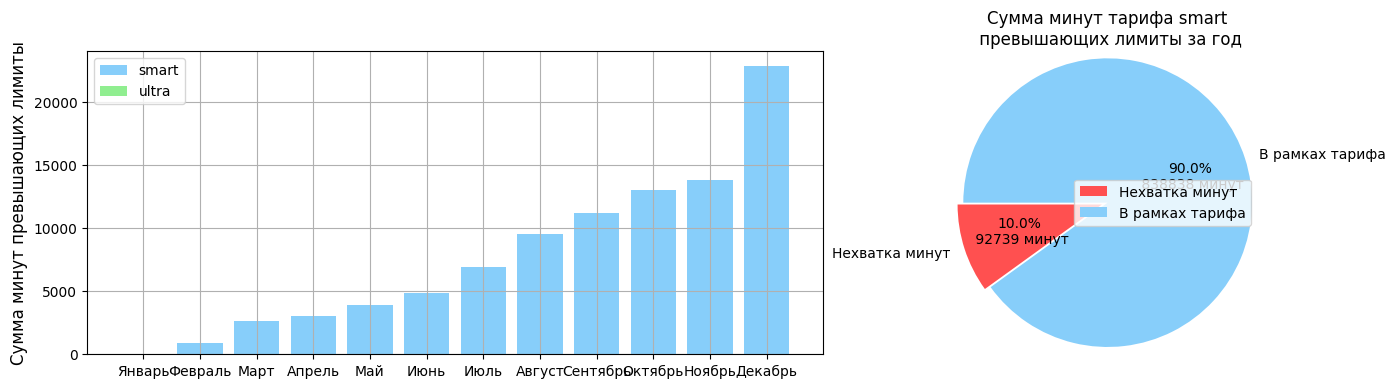

In [45]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

ax1.bar(months, sm_dur_over, label='smart', color='lightskyblue')
ax1.bar(months, ul_dur_over, label='ultra', color='lightgreen')
ax1.set_ylabel('Сумма минут превышающих лимиты', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(months)
ax1.grid(), ax1.legend()

values = [sum(sm_dur_over), sm_dur['duration'].sum() - sum(sm_dur_over)] 
ax2.pie(values, labels=['Нехватка минут', 'В рамках тарифа'],
        colors=['#ff5050', 'lightskyblue'], startangle=180, explode=[0.05, 0], radius=1.2,
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} минут')
ax2.set_title('Сумма минут тарифа smart\n превышающих лимиты за год'), ax2.legend()
plt.show()

Абоненты тарифа `ultra` не превышают лимита по звонкам. Абонентам тарифа `smart` ежемесячно не хватает минут и с каждым месяцем нехватает всё больше.

#### <u>Число абонентов превысивших лимиты тарифа по использованию минут

In [46]:
## Число абонентов превысивших лимиты по использованию минут тарифа SMART
sm_N_dur_over = [m for m in range(0, 12)]
for i in range(0, 12):
    temp = sm_calls[sm_calls['month'] == i+1].groupby('user_id', as_index=False).agg({'duration': 'sum'})
    temp = temp[temp['duration'] > 500]
    temp['dur_over'] = temp['duration'] - 500
    sm_N_dur_over[i] = int(temp['dur_over'].count())
sm_N_dur_over

[1, 11, 23, 28, 40, 50, 69, 77, 95, 102, 114, 144]

In [47]:
## Число абонентов превысивших лимиты по использованию минут тарифа ULTRA
ul_N_dur_over = [m for m in range(0, 12)]
for i in range(0, 12):
    temp = ul_calls[ul_calls['month'] == i+1].groupby('user_id', as_index=False).agg({'duration': 'sum'})
    temp = temp[temp['duration'] > 3000]
    temp['dur_over'] = temp['duration'] - 3000
    ul_N_dur_over[i] = int(temp['dur_over'].count())
ul_N_dur_over

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

(None, <matplotlib.legend.Legend at 0x216ba338800>)

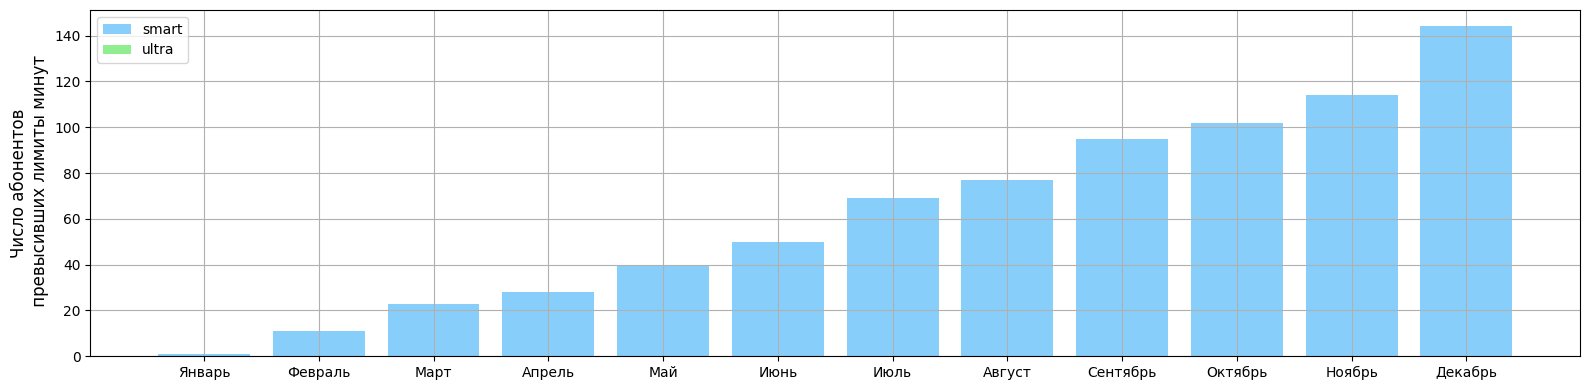

In [48]:
fig, ax = plt.subplots(figsize=[16, 4], tight_layout=True)

ax.bar(months, sm_N_dur_over, label='smart', color='lightskyblue')
ax.bar(months, ul_N_dur_over, label='ultra', color='lightgreen')
ax.set_ylabel('Число абонентов\n превысивших лимиты минут', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.grid(), ax.legend()

Ни один из абонентов тарифа `ultra` не использует минуты сверх тарифного лимита. Число абонентов `smart` превысивших лимит по минутам разговора ежемесячно растёт.

#### <u> Средняя нехватка минут
Сколько в среднем абонентам не хватает минут в месяц

In [49]:
sm_ = [m for m in range(0, 12)]
for i in range(0, 12):
    sm_[i] = sm_dur_over[i]/sm_N_dur_over[i]

(None, <matplotlib.legend.Legend at 0x216b39a1910>)

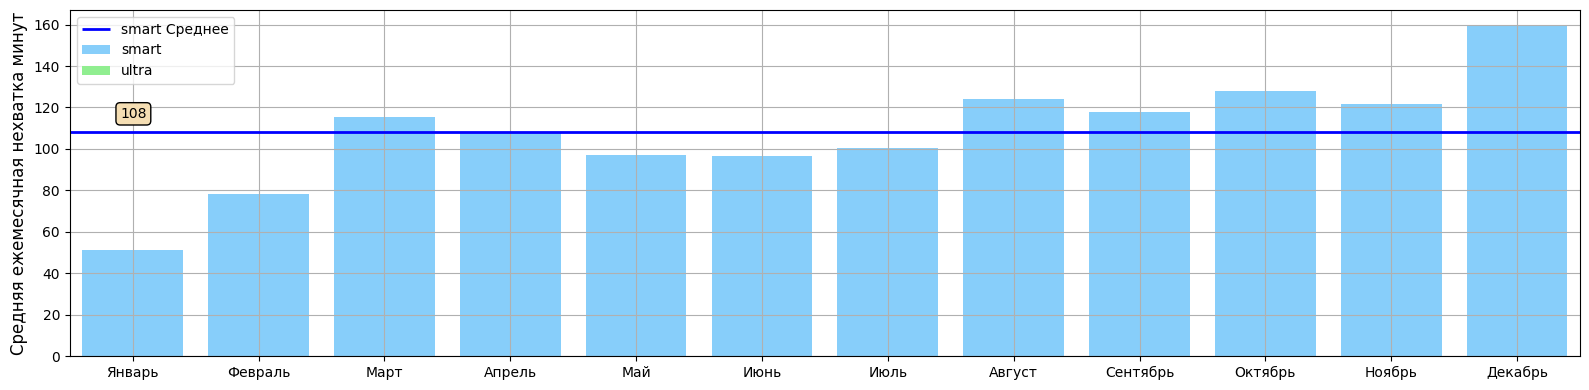

In [50]:
fig, ax = plt.subplots(figsize=[16, 4], tight_layout=True)

ax.bar(months, sm_, label='smart', color='lightskyblue')
ax.bar(months, ul_dur_over, label='ultra', color='lightgreen')
ax.hlines(sum(sm_)/len(sm_), -0.5, 11.5, linewidth=2, color='blue', label='smart Среднее')  # y, x1, x2
ax.set_xlim(left=-0.5, right=11.5)
ax.text(-0.1, 115, s=f'{sum(sm_)/len(sm_):.0f}', color='black', bbox=dict(boxstyle='round', facecolor='wheat'))  # x, y
ax.set_ylabel('Средняя ежемесячная нехватка минут', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.grid(), ax.legend()

In [51]:
# На сколько процентов превышен лимит
round(sum(sm_)/len(sm_)*100/500, 1)

21.6

В среднем абонентам тарифа `smart` не хватает по 108 минут в месяц на человека (22 %). Средняя ежемесячная нехватка минут почти не увеличивается.

<u><font size="+1"><b>Вывод по звонкам:</b></u><a name="Вывод_по_звонкам"></a>
    
Суммарная продолжительность звонков ежемесячно растёт для обоих тарифов. Для тарифа `smart` она на 44 % больше, что объясняется в первую очередь тем, что у тарифа `smart` на 59 % больше активных абонентов, чем у тарифа `ultra`.
    
Абсолютно всем абонентам `ultra` и большинству абонентов `smart` хватает их пакета минут. Для тарифа `smart` за 2018 год превышение по использованию минут разговора составляет 10 % от общего числа использованных их абонентами минут. Нехватка связана с низким потолком лимита минут. Нехватка минут для тарифа `smart` ежемесячно увеличивается, что также связано с увеличением количества активных абонентов.
    
В среднем абонентам тарифа `smart` не хватает по 108 минут на человека в месяц (22 % от установленного лимита в 500 мин/мес).

## <u>3.2) Сообщения<a name="3.2"></a>
<font size="2">([см. Вывод по СМС](#Вывод_по_СМС))</font><br/>

#### <u>Общее число сообщение

In [52]:
sms = users[['user_id', 'tariff']].merge(messages[['user_id', 'month', 'id']], how='inner', on='user_id').rename(columns={'id': 'sms_id'})

In [53]:
# Число сообщений SMART
sm_sms = sms[sms['tariff'] == 'smart'].drop('tariff', axis=1)
sm_sms_N = sm_sms[['month', 'sms_id']].groupby('month', as_index=False).count().rename(columns={'sms_id': 'sms_count'})
#sm_sms_N

In [54]:
# Число сообщений ultra
ul_sms = sms[sms['tariff'] == 'ultra'].drop('tariff', axis=1)
ul_sms_N = ul_sms[['month', 'sms_id']].groupby('month', as_index=False).count().rename(columns={'sms_id': 'sms_count'})
#ul_sms_N

In [55]:
y_sms = (sm_sms_N['sms_count'].sum() - ul_sms_N['sms_count'].sum())*100/sm_sms_N['sms_count'].sum()
print(f"Кол-во СМС 'smart' на {y_sms:.0f} % больше 'ultra'")

Кол-во СМС 'smart' на 35 % больше 'ultra'


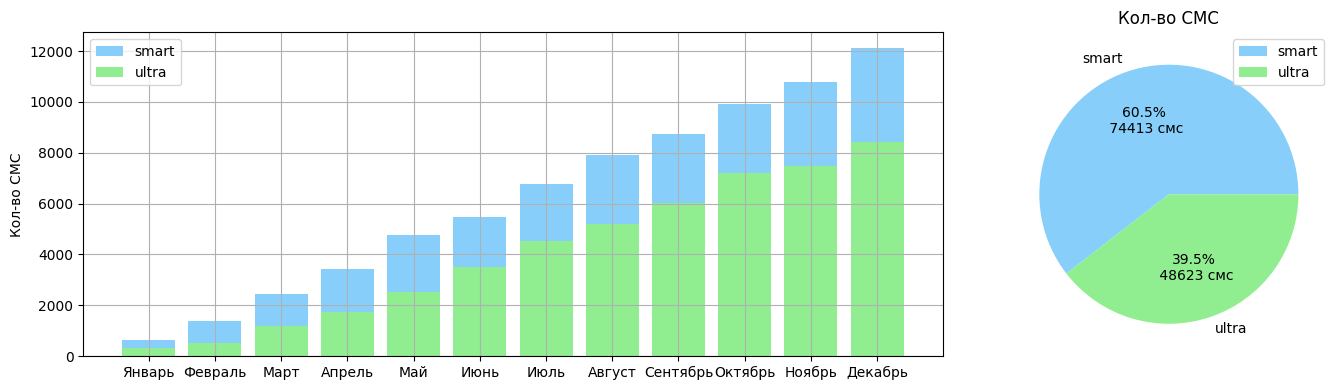

In [56]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

ax1.bar(months, sm_sms_N['sms_count'], label='smart', color='lightskyblue')
ax1.bar(months, ul_sms_N['sms_count'], label='ultra', color='lightgreen')
ax1.set_ylabel('Кол-во СМС', fontsize=10)
ax1.grid(), ax1.legend()

values = [sm_sms_N['sms_count'].sum(), ul_sms_N['sms_count'].sum()] 
ax2.pie(values, labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} смс')
ax2.set_title('Кол-во СМС'), ax2.legend()
plt.show()

Общее число отправленных СМС растёт для обоих тарифов. Абоненты тарифа `smart` отправляют на 35 % больше сообщений, чем абоненты тарифа `ultra`.

#### <u>Число активных абонентов

In [57]:
# Число активных абонентов (людей, которые вообще отправляли сообщения)
sm_sms_act = sm_sms[['month', 'user_id']].groupby('month', as_index=False).nunique().rename(columns={'user_id': 'user_count'})
sm_sms_act_Y = sm_sms['user_id'].nunique()

ul_sms_act = ul_sms[['month', 'user_id']].groupby('month', as_index=False).nunique().rename(columns={'user_id': 'user_count'})
ul_sms_act_Y = ul_sms['user_id'].nunique()

In [58]:
y_sms_act = (sm_sms_act_Y - ul_sms_act_Y)*100/sm_sms_act_Y
print(f"Кол-во активных абонентов 'smart' на {y_sms_act:.0f} % больше 'ultra'")

Кол-во активных абонентов 'smart' на 59 % больше 'ultra'


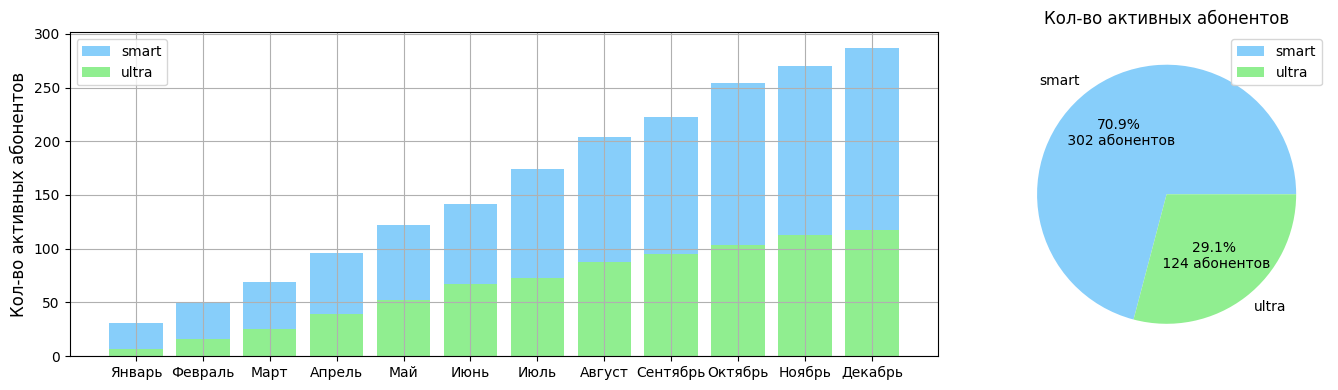

In [59]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

ax1.bar(months, sm_sms_act['user_count'], label='smart', color='lightskyblue')
ax1.bar(months, ul_sms_act['user_count'], label='ultra', color='lightgreen')
ax1.set_ylabel('Кол-во активных абонентов', fontsize=12)
ax1.grid(), ax1.legend()

values = [sm_sms_act_Y, ul_sms_act_Y] 
ax2.pie(values, labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} абонентов')
ax2.set_title('Кол-во активных абонентов'), ax2.legend()
plt.show()

Число активных абонентов растёт для обоих тарифов. Количество активных абонентов тарифа `smart` на 59 % больше, чем активных абонентов тарифа `ultra`.

#### Кол-во сообщений на человека
Отношение числа отправленных сообщений за месяц к числу активных абонентов - этот параметр можно сравнивать с лимитом тарифов.

In [60]:
sm_sms_per_act = sm_sms_N.merge(sm_sms_act, how='outer', on='month')
sm_sms_per_act['sms_per_act'] = sm_sms_per_act['sms_count']/sm_sms_per_act['user_count']

ul_sms_per_act = ul_sms_N.merge(ul_sms_act, how='outer', on='month')
ul_sms_per_act['sms_per_act'] = ul_sms_per_act['sms_count']/ul_sms_per_act['user_count']

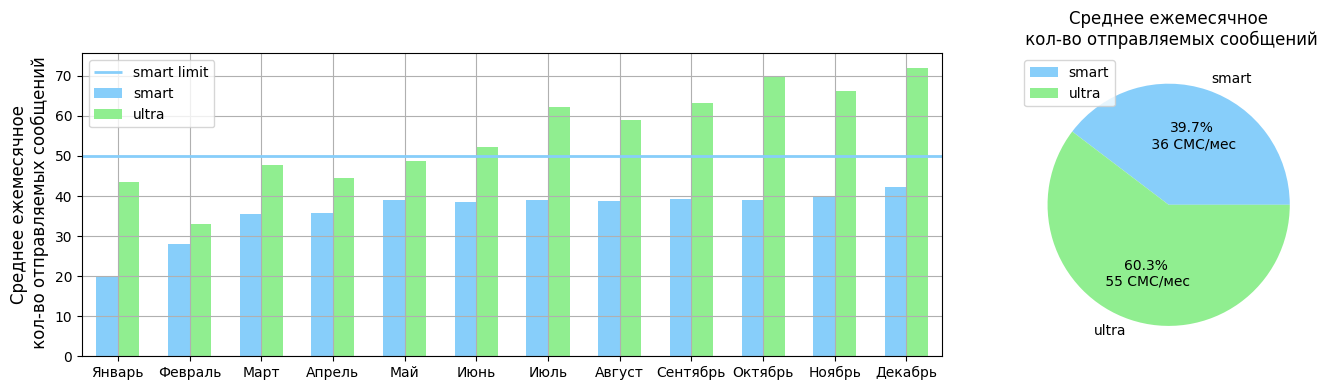

In [61]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
x = np.arange(len(months))
w = 0.3
ax1.bar(x - w/2, sm_sms_per_act['sms_per_act'], w, label='smart', color='lightskyblue')
ax1.bar(x + w/2, ul_sms_per_act['sms_per_act'], w, label='ultra', color='lightgreen')
ax1.set_ylabel('Среднее ежемесячное\n кол-во отправляемых сообщений', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(months)
ax1.hlines(50, -0.5, 11.5, linewidth=2, color='lightskyblue', label='smart limit')  # y, x1, x2
ax1.set_xlim(left=-0.5, right=11.5)
ax1.grid(), ax1.legend()

values = [sm_sms_per_act['sms_per_act'].mean(), ul_sms_per_act['sms_per_act'].mean()] 
ax2.pie(values, labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} СМС/мес')
ax2.set_title('Среднее ежемесячное\n кол-во отправляемых сообщений'), ax2.legend()
plt.show()

Средние значения ежемесячного кол-ва отправляемых СМС не превышает своих лимитов для обоих тарифов. Для тарифа `ultra` оно больше, чем для `smart`.

Т.е. абонентов у `smart` больше, но сообщений каждый из них отправляет мельше.

#### <u>Суммарная нехватка СМС
Кол-во СМС, которое не укладываются в отведённые тарифом лимиты

In [62]:
## Кол-во СМС, которая не укладываются в отведённые тарифом SMART лимиты
sm_N_sms_over = pd.DataFrame()
for i in range(0, 12):
    temp = sm_sms[sm_sms['month'] == i+1].groupby('user_id', as_index=False).agg({'sms_id': 'count'}).rename(columns={'sms_id': 'sms_count'})
    temp['month'] = i+1
    temp = temp[temp['sms_count'] > 50]
    temp['sms_count'] = temp['sms_count'] - 50
    #print(temp)
    sm_N_sms_over = pd.concat([sm_N_sms_over, temp], axis=0)
    sm_N_sms_over = sm_N_sms_over.groupby('month', as_index=False).agg({'sms_count': 'sum'})
#sm_N_sms_over

In [63]:
## Кол-во СМС, которая не укладываются в отведённые тарифом ULTRA лимиты
ul_N_sms_over = pd.DataFrame()
for i in range(0, 12):
    temp = ul_sms[ul_sms['month'] == i+1].groupby('user_id', as_index=False).agg({'sms_id': 'count'}).rename(columns={'sms_id': 'sms_count'})
    temp['month'] = i+1
    temp = temp[temp['sms_count'] > 1000]
    temp['sms_count'] = temp['sms_count'] - 1000
    #print(temp)
    ul_N_sms_over = pd.concat([ul_N_sms_over, temp], axis=0)
    ul_N_sms_over = ul_N_sms_over.groupby('month', as_index=False).agg({'sms_count': 'sum'})
ul_N_sms_over.sum().sum()

np.int64(0)

Все абоненты `ultra` уложились в лимиты тарифа

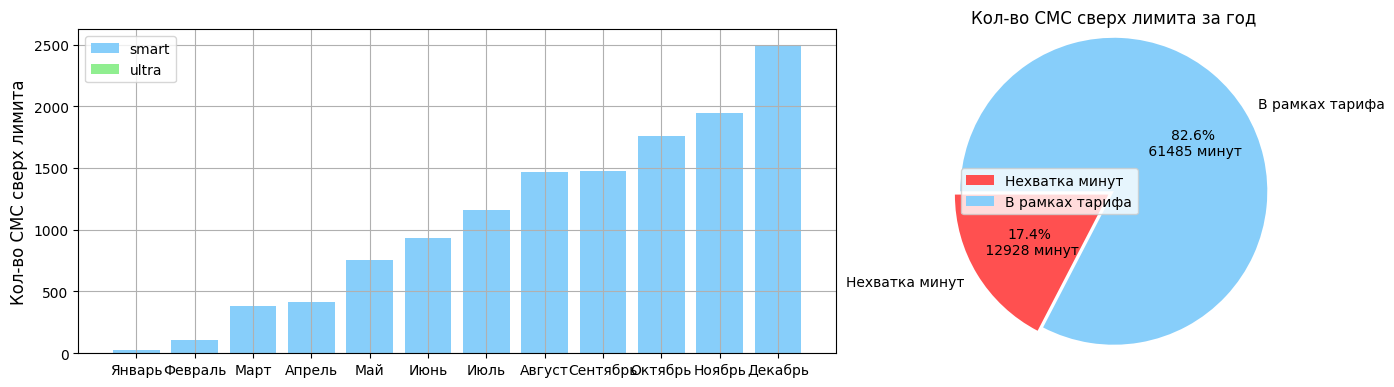

In [64]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

ax1.bar(months, sm_N_sms_over['sms_count'], label='smart', color='lightskyblue')
ax1.bar(months, 0*np.arange(1, 13), label='ultra', color='lightgreen')
ax1.set_ylabel('Кол-во СМС сверх лимита', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(months)
ax1.grid(), ax1.legend()

values = [sm_N_sms_over['sms_count'].sum(), sm_sms_N['sms_count'].sum() - sm_N_sms_over['sms_count'].sum()] 
ax2.pie(values, labels=['Нехватка минут', 'В рамках тарифа'],
        colors=['#ff5050', 'lightskyblue'], startangle=180, explode=[0.05, 0], radius=1.2,
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} минут')
ax2.set_title('Кол-во СМС сверх лимита за год'), ax2.legend()
plt.show()

Все абоненты `ultra` уложились в лимиты тарифа. На тарифе `smart` за год сверх установленного лимита было отправлено 12928 СМС, что составляет 17 % от общего числа отправленных сообщений.

#### <u>Число абонентов превысивших лимиты тарифа по использованию СМС

In [65]:
## Число абонентов превысивших лимиты по использованию СМС тарифа SMART
sm_SMS_act_over = [m for m in range(0, 12)]
for i in range(0, 12):
    temp = sm_sms[sm_sms['month'] == i+1].groupby('user_id', as_index=False).agg({'sms_id': 'count'})    
    temp = temp[temp['sms_id'] > 50]
    sm_SMS_act_over[i] = temp['user_id'].count()
sm_SMS_act_over

[np.int64(1),
 np.int64(6),
 np.int64(19),
 np.int64(22),
 np.int64(35),
 np.int64(44),
 np.int64(53),
 np.int64(61),
 np.int64(65),
 np.int64(76),
 np.int64(83),
 np.int64(99)]

In [66]:
## Число абонентов превысивших лимиты по использованию СМС тарифа ULTRA
ul_SMS_act_over = [m for m in range(0, 12)]
for i in range(0, 12):
    temp = ul_sms[ul_sms['month'] == i+1].groupby('user_id', as_index=False).agg({'sms_id': 'count'})    
    temp = temp[temp['sms_id'] > 1000]
    ul_SMS_act_over[i] = temp['user_id'].count()
ul_SMS_act_over

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

Все абоненты `ultra` уложились в лимиты тарифа

(None, <matplotlib.legend.Legend at 0x216b2c14140>)

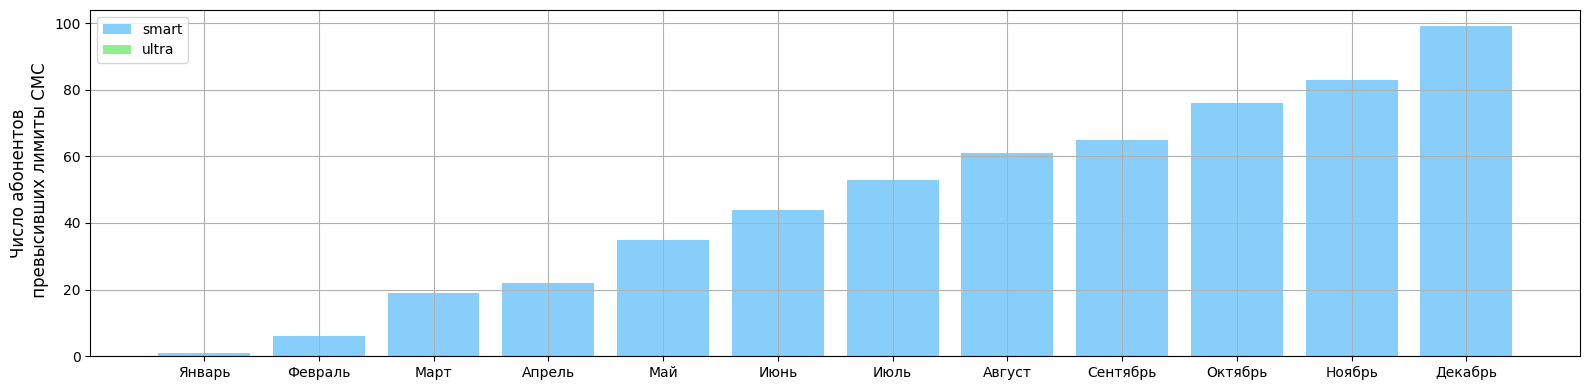

In [67]:
fig, ax = plt.subplots(figsize=[16, 4], tight_layout=True)

ax.bar(months, sm_SMS_act_over, label='smart', color='lightskyblue')
ax.bar(months, ul_SMS_act_over, label='ultra', color='lightgreen')
ax.set_ylabel('Число абонентов\n превысивших лимиты СМС', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.grid(), ax.legend()

Ни один из абонентов тарифа `ultra` не использует СМС сверх тарифного лимита. Число абонентов `smart` превысивших лимит по СМС разговора ежемесячно растёт.

#### <u> Средняя нехватка СМС
Сколько в среднем каждому абоненту не хватает СМС

In [68]:
r = sm_N_sms_over['sms_count']/sm_SMS_act_over

(None, <matplotlib.legend.Legend at 0x216ba3627e0>)

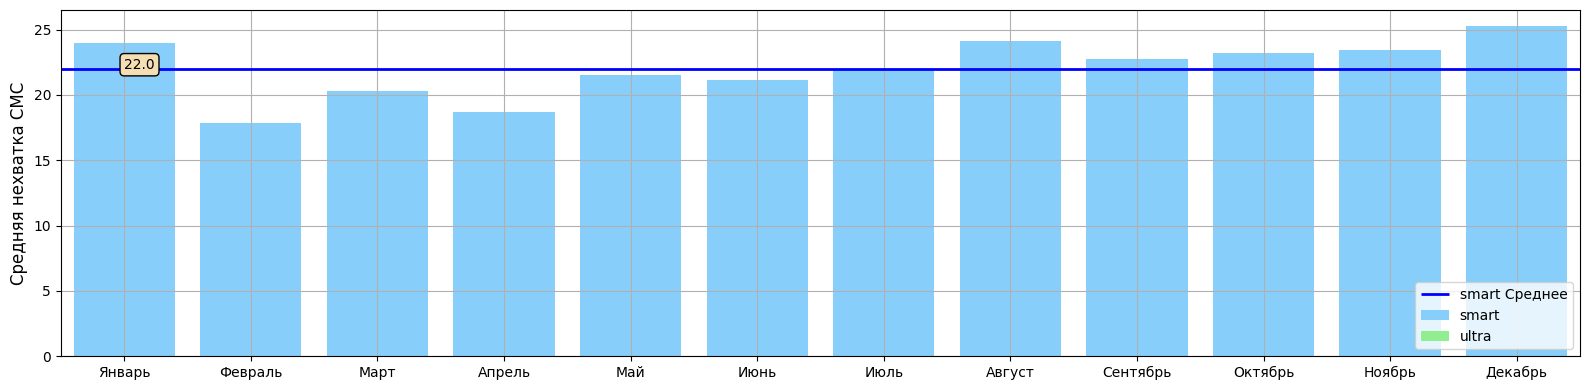

In [69]:
fig, ax = plt.subplots(figsize=[16, 4], tight_layout=True)

ax.bar(months, r, label='smart', color='lightskyblue')
ax.bar(months, ul_dur_over, label='ultra', color='lightgreen')
ax.hlines(sum(r)/len(r), -0.5, 11.5, linewidth=2, color='blue', label='smart Среднее')  # y, x1, x2
ax.set_xlim(left=-0.5, right=11.5)
ax.text(0, 22, s=f'{sum(r)/len(r):.1f}', color='black', bbox=dict(boxstyle='round', facecolor='wheat'))  # x, y
ax.set_ylabel('Средняя нехватка СМС', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.grid(), ax.legend(loc='lower right')

In [70]:
# На сколько процентов превышен лимит
round((sum(r)/len(r))*100/50, 1)

44.0

Всем абоннтам `ultra` хватает пакета СМС. В среднем абонентам `smart` превысившим лимит в 50 СМС не хватает по 22 сообщений в месяц на человека (44 %). Средняя ежемесячная нехватка СМС почти не увеличивается.

<u><font size="+1"><b>Вывод по СМС:</b></u><a name="Вывод_по_СМС"></a>    

Общее число отправленных СМС ежемесячно растёт для обоих тарифов. Абоненты тарифа `smart` отправляют на 35 % больше сообщений, что объясняется тем, что у тарифа `smart` на 59 % больше активных абонентов, чем у тарифа `ultra`.
    
Абсолютно всем абонентам `ultra` и большинству абонентов `smart` хватает их пакета СМС. Доля СМС сверх  лимитов для тарифа `smart` составляет 17 % от общего числа. Нехватка связана с низким потолком лимита СМС. Нехватка СМС для тарифа `smart` ежемесячно увеличивается, что также связано с увеличением количества активных абонентов.
    
В среднем абонентам тарифа `smart` превысившим лимиты тарифа не хватает по 22 сообщений на человека в месяц (44 % от установленного лимита).

## <u>3.3) Интернет<a id="3.3"></a>
<font size="2">([см. Вывод по интернету](#Вывод_по_интернету))</font><br/>

#### <u>Общий объём трафика</u>

In [71]:
users_internet = users[['user_id', 'tariff']].merge(internet[['user_id', 'month', 'mb_used', 'id']], how='inner', on='user_id')
sm_internet = users_internet[users_internet['tariff'] == 'smart']
ul_internet = users_internet[users_internet['tariff'] == 'ultra']

In [72]:
## SMART
sm_GB = pd.DataFrame()
for i in range(0, 12):
    temp = sm_internet[['user_id', 'month', 'mb_used']]
    temp = temp[temp['month'] == i+1].drop('month', axis=1).groupby('user_id', as_index=False).sum()
    temp['month'] = i+1
    temp['GB_used'] = np.ceil(temp['mb_used']/1000).astype('int')
    #temp = temp.drop('mb_used', axis=1)
    temp = temp.groupby('month', as_index=False).sum()
    sm_GB = pd.concat([sm_GB, temp], axis=0)
    sm_GB.reset_index(drop=True, inplace=True)

In [73]:
## ULTRA
ul_GB = pd.DataFrame()
for i in range(0, 12):
    temp = ul_internet[['user_id', 'month', 'mb_used']]
    temp = temp[temp['month'] == i+1].drop('month', axis=1).groupby('user_id', as_index=False).sum()
    temp['month'] = i+1
    temp['GB_used'] = np.ceil(temp['mb_used']/1000).astype('int')
    #temp = temp.drop('mb_used', axis=1)
    temp = temp.groupby('month', as_index=False).sum()
    ul_GB = pd.concat([ul_GB, temp], axis=0)
    ul_GB.reset_index(drop=True, inplace=True)

In [74]:
y_Gb = (sm_GB['GB_used'].sum() - ul_GB['GB_used'].sum())*100/sm_GB['GB_used'].sum()
print(f"Суммарное потребление трафика 'smart' на {y_Gb:.0f} % больше 'ultra'")

Суммарное потребление трафика 'smart' на 47 % больше 'ultra'


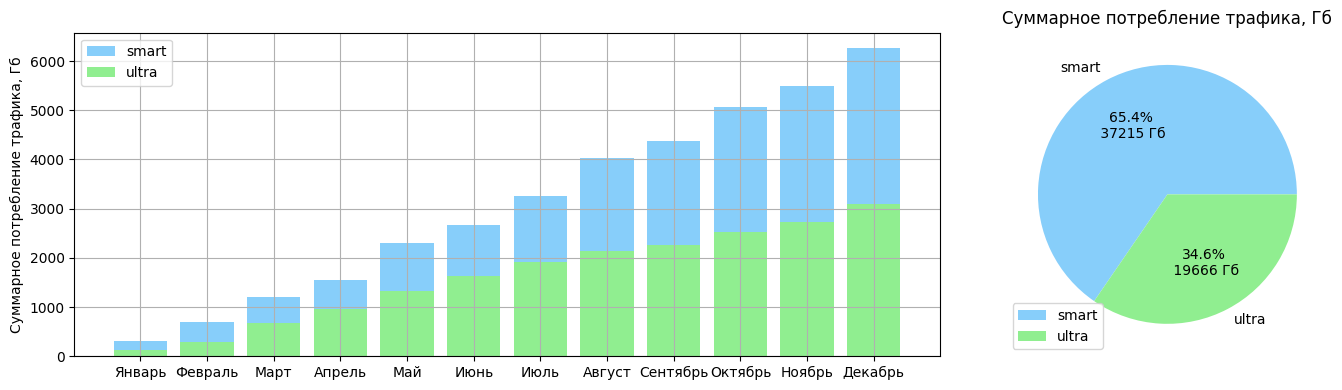

In [75]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

ax1.bar(months, sm_GB['GB_used'], label='smart', color='lightskyblue')
ax1.bar(months, ul_GB['GB_used'], label='ultra', color='lightgreen')
ax1.set_ylabel('Суммарное потребление трафика, Гб', fontsize=10)
ax1.grid(), ax1.legend()

values = [sm_GB['GB_used'].sum(), ul_GB['GB_used'].sum()] 
ax2.pie(values, labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} Гб')
ax2.set_title('Суммарное потребление трафика, Гб'), ax2.legend()
plt.show()

Потребление трафика ежемесячно растёт для обоих тарифов. Абоненты тарифа `smart` используют на 47 % больше трафика, чем абоненты `ultra`.

#### <u>Округление Мб до Гб
Определим, какое количество интернет трафика за год добавится при ежемесячном округлении Мб до Гб

In [76]:
y_sm = (1000*sm_GB['GB_used'].sum() - int(sm_GB['mb_used'].sum()))*100/(1000*sm_GB['GB_used'].sum())
y_ul = (1000*ul_GB['GB_used'].sum() - int(ul_GB['mb_used'].sum()))*100/(1000*ul_GB['GB_used'].sum())

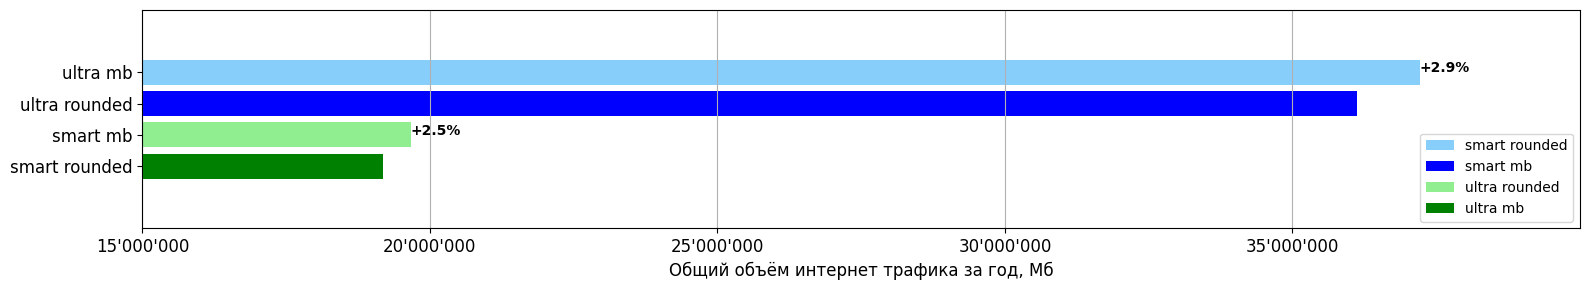

In [77]:
fig, ax = plt.subplots(figsize=[16, 3], tight_layout=True)

ax.barh(4, 1000*sm_GB['GB_used'].sum(), label='smart rounded', color='lightskyblue')
ax.barh(3, int(sm_GB['mb_used'].sum()), label='smart mb', color='blue')
ax.barh(2, 1000*ul_GB['GB_used'].sum(), label='ultra rounded', color='lightgreen')
ax.barh(1, int(ul_GB['mb_used'].sum()), label='ultra mb', color='green')

ax.text(1000*sm_GB['GB_used'].sum(), 4, s=f'+{y_sm:.1f}%', fontweight='bold')  # x, y
ax.text(1000*ul_GB['GB_used'].sum(), 2, s=f'+{y_ul:.1f}%', fontweight='bold')  # x, y

ax.set_xlim(left=15000000, right=40000000)
ax.set_ylim(bottom=-1, top=6)
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['smart rounded', 'smart mb', 'ultra rounded', 'ultra mb'], fontsize=12)
ax.set_xticks([15000000, 20000000, 25000000, 30000000, 35000000])
ax.set_xticklabels(["15'000'000", "20'000'000", "25'000'000", "30'000'000", "35'000'000"], fontsize=12)

ax.set_xlabel('Общий объём интернет трафика за год, Мб', fontsize=12)
ax.grid(axis='x'), ax.legend(loc='lower right')
plt.show()

Объём интернет трафика за год, добавленный при округлении Мб до Гб, составил 2,9 % для тарифа `smart` и 2,5% для тарифа `ultra`. Данные значения не являются существенными.

#### <u>Число активных абонентов

In [78]:
# Число активных абонентов (людей, которые вообще выходили в интернет)
sm_internet_act = sm_internet[['month', 'user_id']].groupby('month', as_index=False).nunique().rename(columns={'user_id': 'user_count'})
sm_internet_act_Y = sm_internet['user_id'].nunique()
sm_internet_act.reset_index(drop=True, inplace=True)

ul_internet_act = ul_internet[['month', 'user_id']].groupby('month', as_index=False).nunique().rename(columns={'user_id': 'user_count'})
ul_internet_act_Y = ul_internet['user_id'].nunique()
ul_internet_act.reset_index(drop=True, inplace=True)

In [79]:
y_act = (sm_internet_act_Y - ul_internet_act_Y)*100/sm_internet_act_Y
print(f"Число активных абонентов 'smart' на {y_act:.0f} % больше 'ultra'")

Число активных абонентов 'smart' на 58 % больше 'ultra'


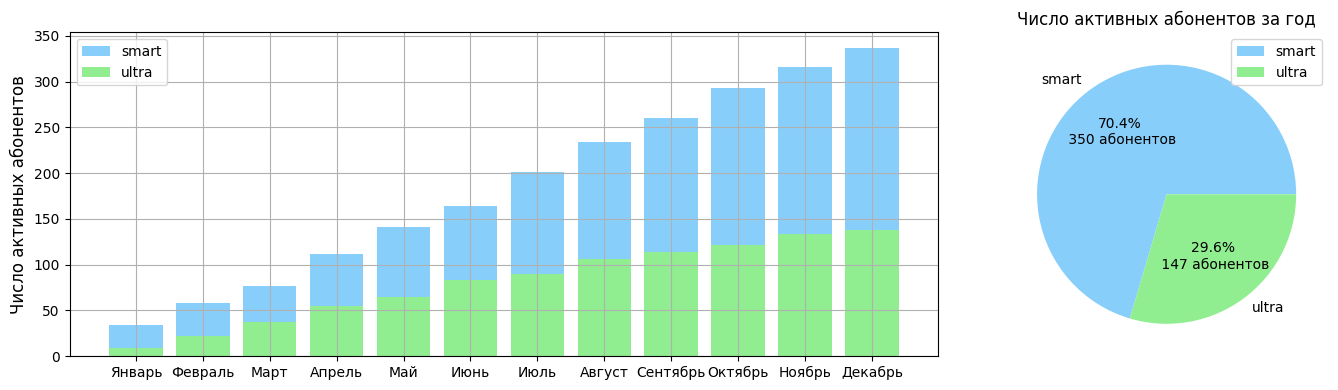

In [80]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

ax1.bar(months, sm_internet_act['user_count'], label='smart', color='lightskyblue')
ax1.bar(months, ul_internet_act['user_count'], label='ultra', color='lightgreen')
ax1.set_ylabel('Число активных абонентов', fontsize=12)
ax1.grid(), ax1.legend()

values = [sm_internet_act_Y, ul_internet_act_Y] 
ax2.pie(values, labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} абонентов')
ax2.set_title('Число активных абонентов за год'), ax2.legend()
plt.show()

Число активных абонентов обоих тарифов ежемесячно растёт. Число активных абонентов тарифа `smart` на 58 % больше, чем у тарифа `ultra`.

#### <u>Среднее ежемесячное потребление трафика
Среднее ежемесячное потребление трафика показывает укладываются ли в среднем абоненты в лимиты тарифов.

In [81]:
sm_GB_per_act = sm_GB.merge(sm_internet_act, how='outer', on='month') 
sm_GB_per_act['GB_per_act'] = sm_GB_per_act['GB_used']/sm_GB_per_act['user_count']

ul_GB_per_act = ul_GB.merge(ul_internet_act, how='outer', on='month') 
ul_GB_per_act['GB_per_act'] = ul_GB_per_act['GB_used']/ul_GB_per_act['user_count']

In [82]:
y_Gb_mean = (ul_GB_per_act['GB_per_act'].mean() - sm_GB_per_act['GB_per_act'].mean())*100/ul_GB_per_act['GB_per_act'].mean()
print(f"Среднее ежемесячное потребление трафика абонентами 'ultra' на {y_Gb_mean:.0f} % больше 'smart'")

Среднее ежемесячное потребление трафика абонентами 'ultra' на 18 % больше 'smart'


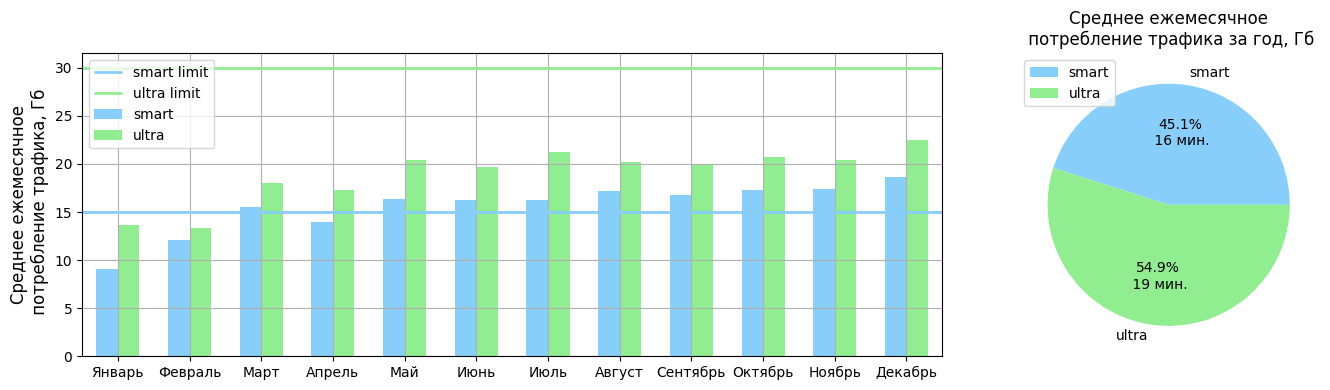

In [83]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

x = np.arange(len(months))
w = 0.3
ax1.bar(x - w/2, sm_GB_per_act['GB_per_act'], w, label='smart', color='lightskyblue')
ax1.bar(x + w/2, ul_GB_per_act['GB_per_act'], w, label='ultra', color='lightgreen')
ax1.hlines(15, -0.5, 11.5, linewidth=2, color='lightskyblue', label='smart limit')  # y, x1, x2
ax1.hlines(30, -0.5, 11.5, linewidth=2, color='lightgreen', label='ultra limit')  # y, x1, x2
ax1.set_xlim(left=-0.5, right=11.5)
ax1.set_ylabel('Среднее ежемесячное\n потребление трафика, Гб', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(months)
ax1.grid(), ax1.legend()

values = [sm_GB_per_act['GB_per_act'].mean(), ul_GB_per_act['GB_per_act'].mean()] 
ax2.pie(values, labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} мин.')
ax2.set_title('Среднее ежемесячное\n потребление трафика за год, Гб'), ax2.legend()
plt.show()

В среднем каждый абонент `ultra` использует на 18 % больше Гб, чем `smart`

#### <u>Общая нехватка трафика
Сумма использованного трафика (уже округлённого до Гб), которая не укладываются в отведённые тарифом лимиты

In [84]:
## SMART
sm_GB_over = pd.DataFrame()
for i in range(0, 12):
    temp = sm_internet[['user_id', 'month', 'mb_used']]
    temp = temp[temp['month'] == i+1].drop('month', axis=1).groupby('user_id', as_index=False).sum()
    temp['month'] = i+1
    temp['GB_used'] = np.ceil(temp['mb_used']/1000).astype('int')
    temp = temp.drop('mb_used', axis=1)
    temp = temp[temp['GB_used'] >= 15]
    temp['Gb_over'] = temp['GB_used'] - 15
    temp = temp.groupby('month', as_index=False).agg({'Gb_over': 'sum'})
    sm_GB_over = pd.concat([sm_GB_over, temp], axis=0).reset_index(drop=True)
sm_GB_over    

,month,Gb_over
0,1,32
1,2,74
2,3,210
3,4,199
4,5,432
5,6,492
6,7,605
7,8,812
8,9,798
9,10,1054


In [85]:
## ULTRA
ul_GB_over = pd.DataFrame(columns=['month', 'Gb_over'])
ul_GB_over.loc[0] = [1, 0]
for i in range(1, 12):
    temp = ul_internet[['user_id', 'month', 'mb_used']]
    temp = temp[temp['month'] == i+1].drop('month', axis=1).groupby('user_id', as_index=False).sum()
    temp['month'] = i+1
    temp['GB_used'] = np.ceil(temp['mb_used']/1000).astype('int')
    temp = temp.drop('mb_used', axis=1)
    temp = temp[temp['GB_used'] >= 30]
    temp['Gb_over'] = temp['GB_used'] - 30
    temp = temp.groupby('month', as_index=False).agg({'Gb_over': 'sum'})
    ul_GB_over = pd.concat([ul_GB_over, temp], axis=0).reset_index(drop=True)

ul_GB_over

,month,Gb_over
0,1,0
1,2,6
2,3,19
3,4,26
4,5,55
5,6,57
6,7,116
7,8,113
8,9,68
9,10,110


In [86]:
y_Gb = (sm_GB_over['Gb_over'].sum() - ul_GB_over['Gb_over'].sum())*100/sm_GB_over['Gb_over'].sum()
print(f"Общая нехватка Гб 'smart' на {y_Gb:.0f} % больше 'ultra'")

Общая нехватка Гб 'smart' на 87 % больше 'ultra'


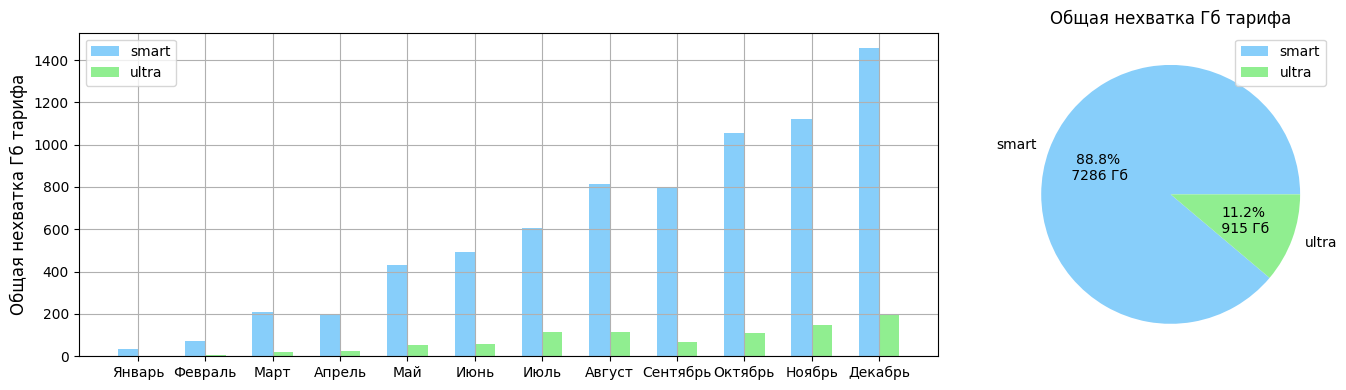

In [87]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 3, (1, 2))  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 3, 3)

x = np.arange(len(months))
w = 0.3
ax1.bar(x - w/2, sm_GB_over['Gb_over'], w, label='smart', color='lightskyblue')
ax1.bar(x + w/2, ul_GB_over['Gb_over'], w, label='ultra', color='lightgreen')

ax1.set_ylabel('Общая нехватка Гб тарифа', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(months)
ax1.grid(), ax1.legend()

values = [sm_GB_over['Gb_over'].sum(), ul_GB_over['Gb_over'].sum()] 
ax2.pie(values, labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} Гб')
ax2.set_title('Общая нехватка Гб тарифа'), ax2.legend()
plt.show()

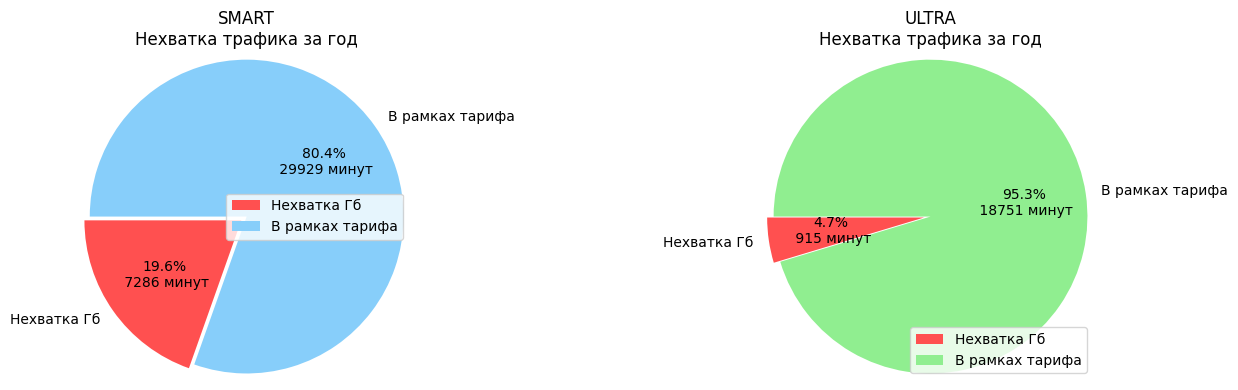

In [88]:
fig = plt.figure(tight_layout=True, figsize=[14, 4])
ax1 = fig.add_subplot(1, 2, 1)  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 2, 2)
# SMART
values = [sm_GB_over['Gb_over'].sum(), sm_GB['GB_used'].sum() - sm_GB_over['Gb_over'].sum()] 
ax1.pie(values, labels=['Нехватка Гб', 'В рамках тарифа'],
        colors=['#ff5050', 'lightskyblue'], startangle=180, explode=[0.05, 0], radius=1.2,
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} минут')
ax1.set_title('SMART\nНехватка трафика за год'), ax1.legend()
# ULTRA
values = [ul_GB_over['Gb_over'].sum(), ul_GB['GB_used'].sum() - ul_GB_over['Gb_over'].sum()] 
ax2.pie(values, labels=['Нехватка Гб', 'В рамках тарифа'],
        colors=['#ff5050', 'lightgreen'], startangle=180, explode=[0.05, 0], radius=1.2,
        autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} минут')
ax2.set_title('ULTRA\nНехватка трафика за год'), ax2.legend()
plt.show()

Общая нехватка трафика обоих тарифов ежемесячно растёт. Нехватка трафика тарифа `smart` на 87 % больше, чем у тарифа `ultra`.

#### <u>Число абонентов превысивших лимиты тарифа по использованию интернет трафика

In [89]:
## Число абонентов SMART превысивших лимиты по использованию интернет трафика 
sm_GB_act_over = [m for m in range(0, 12)]
for i in range(0, 12):
    temp = sm_internet[sm_internet['month'] == i+1].groupby('user_id', as_index=False).agg({'mb_used': 'sum'})
    temp['GB_used'] = np.ceil(temp['mb_used']/1000).astype('int')
    temp = temp[temp['GB_used'] > 15]
    sm_GB_act_over[i] = temp['GB_used'].count()
#sm_GB_act_over

In [90]:
## Число абонентов ULTRA превысивших лимиты по использованию интернет трафика 
ul_GB_act_over = [m for m in range(0, 12)]
for i in range(0, 12):
    temp = ul_internet[ul_internet['month'] == i+1].groupby('user_id', as_index=False).agg({'mb_used': 'sum'})
    temp['GB_used'] = np.ceil(temp['mb_used']/1000).astype('int')
    temp = temp[temp['GB_used'] > 30]
    ul_GB_act_over[i] = temp['GB_used'].count()
    #print(temp)
#ul_GB_act_over

(None, <matplotlib.legend.Legend at 0x216bd8a0800>)

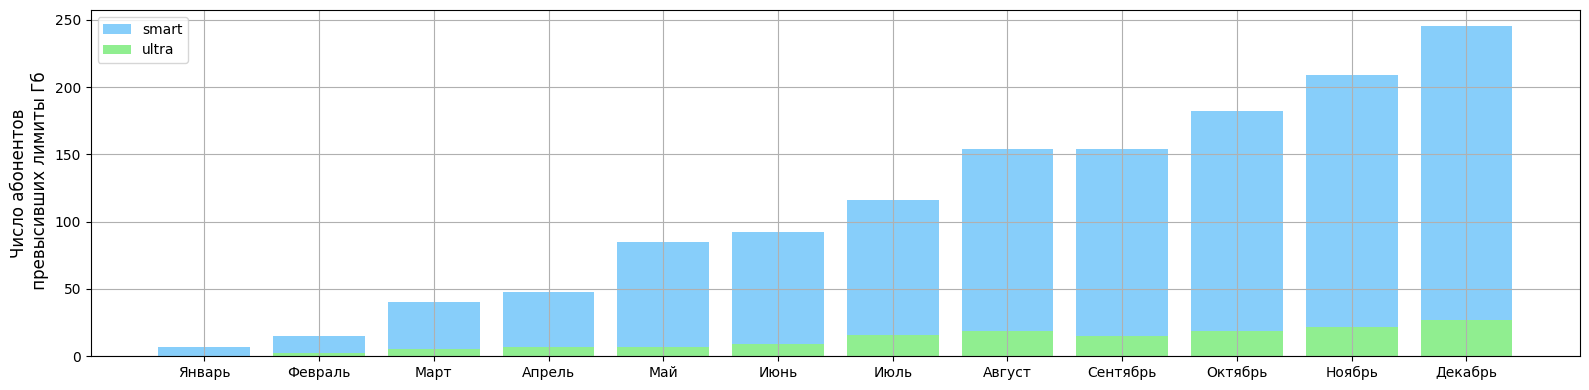

In [91]:
fig, ax = plt.subplots(figsize=[16, 4], tight_layout=True)

ax.bar(months, sm_GB_act_over, label='smart', color='lightskyblue')
ax.bar(months, ul_GB_act_over, label='ultra', color='lightgreen')
ax.set_ylabel('Число абонентов\n превысивших лимиты Гб', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.grid(), ax.legend()

Число абонентов обоих тарифов превысивших лимит по СМС разговора ежемесячно растёт.

#### <u> Средняя нехватка трафика
Сколько в среднем каждому абоненту не хватает трафика (Отношение числа Гб использованных сверх лимита к числу абонентов использовавших Гб сверх лимита)

In [92]:
sm_r = sm_GB_over['Gb_over']/sm_GB_act_over
ul_r = ul_GB_over['Gb_over']/ul_GB_act_over
ul_rr = ul_r.dropna()

(None, <matplotlib.legend.Legend at 0x216bd1a83e0>)

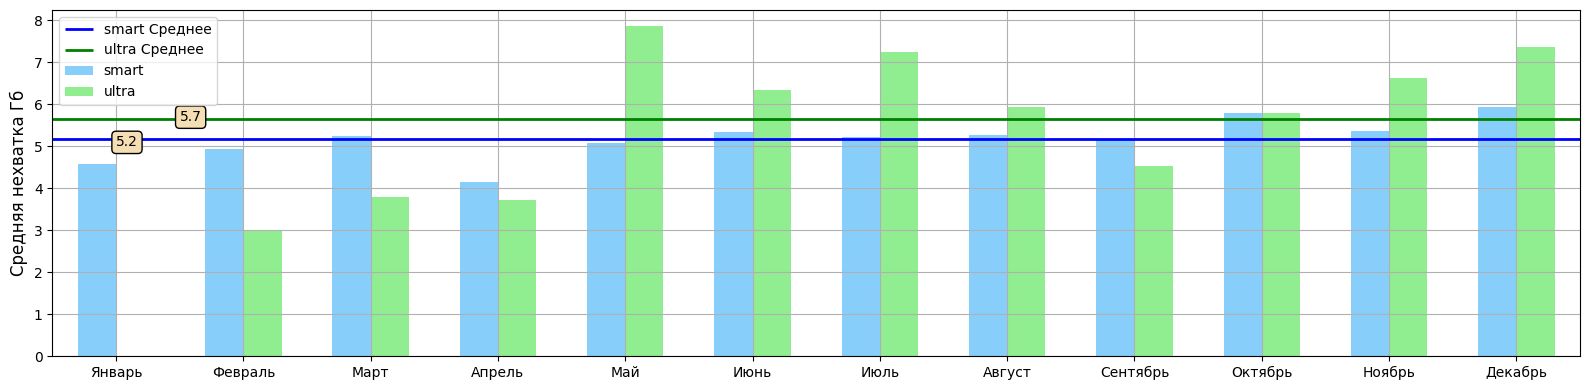

In [93]:
fig, ax = plt.subplots(figsize=[16, 4], tight_layout=True)

x = np.arange(len(months))
w = 0.3
ax.bar(x - w/2, sm_r, w, label='smart', color='lightskyblue')
ax.bar(x + w/2, ul_r, w, label='ultra', color='lightgreen')
ax.hlines(sum(sm_r)/len(sm_r), -0.5, 11.5, linewidth=2, color='blue', label='smart Среднее')  # y, x1, x2
ax.hlines(sum(ul_rr)/len(ul_rr), -0.5, 11.5, linewidth=2, color='green', label='ultra Среднее')  # y, x1, x2
ax.set_xlim(left=-0.5, right=11.5)
ax.text(0, 5, s=f'{sum(sm_r)/len(sm_r):.1f}', color='black', bbox=dict(boxstyle='round', facecolor='wheat'))  # x, y
ax.text(0.5, 5.6, s=f'{sum(ul_rr)/len(ul_rr):.1f}', color='black', bbox=dict(boxstyle='round', facecolor='wheat'))  # x, y
ax.set_ylabel('Средняя нехватка Гб', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.grid(), ax.legend()

In [94]:
# На сколько процентов превышен лимит
print(round((sum(sm_r)/len(sm_r))*100/15, 1))
print(round((sum(ul_rr)/len(ul_rr))*100/30, 1))

34.5
18.9


В среднем абонентам `smart` превысившим лимит в 15 Гб не хватает по 5 Гб в месяц на человека (35 %), а абонентам `ultra` превысившим лимит в 30 Гб не хватает по 6 Гб в месяц на человека (19 %)

<u><font size="+1"><b>Вывод по интернет трафику:</b></u><a name="Вывод_по_интернету"></a>    

Общее потребление трафика ежемесячно растёт для обоих тарифов. Абоненты тарифа `smart` используют на 47 % больше трафика, чем абоненты `ultra`, что объясняется тем, что у тарифа `smart` на 58 % больше активных абонентов, чем у тарифа `ultra`.

Абонентам обоих тарифов не хватает базового объёма трафика. Общая нехватка трафика обоих тарифов ежемесячно растёт. Нехватка трафика тарифа `smart` на 87 % больше, чем у тарифа `ultra`.
    
В среднем абонентам `smart` превысившим лимит в 15 Гб не хватает по 5 Гб в месяц на человека (35 %), а абонентам `ultra` превысившим лимит в 30 Гб не хватает по 6 Гб в месяц на человека (19 %)

## <u>3.4) Выручка<a id="3.4"></a>
<font size="2">([см. Вывод по выручке](#Вывод_по_выручке))</font><br/>

<b>Общая выручка = выручка за базовую стоимость тарифа + доплату за услуги сверх тарифного плана</b>

### <u>3.4.1) Выручка за базовую часть тарифа

In [95]:
# Число абонентов smart и ultra
sm_N_users = users['tariff'][users['tariff'] == 'smart'].count()
ul_N_users = users['tariff'][users['tariff'] == 'ultra'].count()

In [96]:
sm_base_revenue = sm_N_users * 550
ul_base_revenue = ul_N_users * 1950
print('Выручка за базовую часть smart:', sm_base_revenue, 'руб.')
print('Выручка за базовую часть ultra:', ul_base_revenue, 'руб.')

Выручка за базовую часть smart: 193050 руб.
Выручка за базовую часть ultra: 290550 руб.


### <u>3.4.2) Доплата за звонки сверх лимита

In [97]:
sm_calls_revenue = sum(sm_dur_over) * 3
ul_calls_revenue = sum(ul_dur_over) * 1
print('Доплата за звонки сверх лимита smart:', sm_calls_revenue, 'руб.')
print('Доплата за звонки сверх лимита ultra:', ul_calls_revenue, 'руб.')

Доплата за звонки сверх лимита smart: 278217 руб.
Доплата за звонки сверх лимита ultra: 0 руб.


### <u>3.4.3) Доплата за СМС сверх лимита

In [98]:
sm_sms_revenue = sm_N_sms_over['sms_count'].sum() * 3
ul_sms_revenue = ul_N_sms_over['sms_count'].sum() * 1
print('Доплата за СМС сверх лимита smart:', sm_sms_revenue, 'руб.')
print('Доплата за СМС сверх лимита ultra:', ul_sms_revenue, 'руб.')

Доплата за СМС сверх лимита smart: 38784 руб.
Доплата за СМС сверх лимита ultra: 0 руб.


### <u>3.4.4) Доплата за интернет трафик сверх лимита

In [99]:
sm_GB_revenue = sm_GB_over['Gb_over'].sum() * 200
ul_GB_revenue = int(ul_GB_over['Gb_over'].sum()) * 150
print('Доплата за интернет трафик сверх лимита smart:', sm_GB_revenue, 'руб.')
print('Доплата за интернет трафик сверх лимита ultra:', ul_GB_revenue, 'руб.')

Доплата за интернет трафик сверх лимита smart: 1457200 руб.
Доплата за интернет трафик сверх лимита ultra: 137250 руб.


### <u>3.4.5) Сравнение выручки

#### Сравнение источников выручки

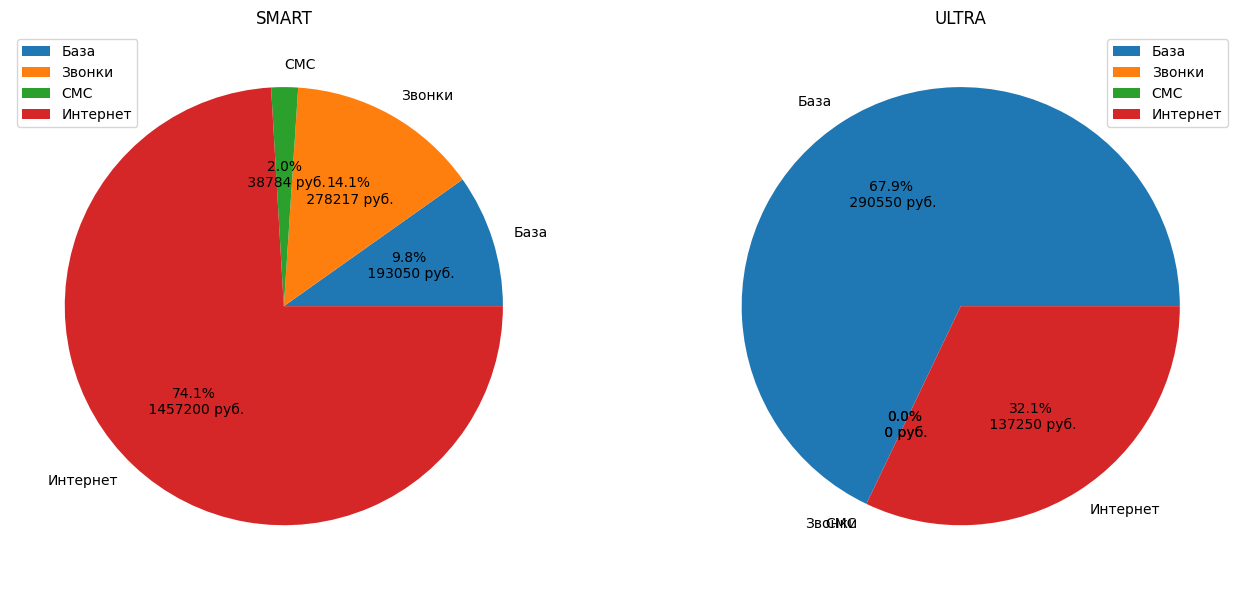

In [100]:
fig = plt.figure(tight_layout=True, figsize=[14, 6])
ax1 = fig.add_subplot(1, 2, 1)  # Строки, столбцы, квадрант
ax2 = fig.add_subplot(1, 2, 2)

# SMART
values = [sm_base_revenue, sm_calls_revenue, sm_sms_revenue, sm_GB_revenue] 
ax1.pie(values, labels=['База', 'Звонки', 'СМС', 'Интернет'], autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} руб.')
ax1.set_title('SMART'), ax1.legend()

# ULTRA
values = [ul_base_revenue, ul_calls_revenue, ul_sms_revenue, ul_GB_revenue] 
ax2.pie(values, labels=['База', 'Звонки', 'СМС', 'Интернет'], autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} руб.')
ax2.set_title('ULTRA'), ax2.legend()
plt.show()

#### Сравнение общей выручки

In [101]:
sm_rev = sm_base_revenue + sm_calls_revenue + sm_sms_revenue + sm_GB_revenue
ul_rev = ul_base_revenue + ul_calls_revenue + ul_sms_revenue + ul_GB_revenue
print("Общая выручка тарифа 'smart:'", sm_rev, 'руб.' )
print("Общая выручка тарифа 'ultra:'", ul_rev, 'руб.' )

Общая выручка тарифа 'smart:' 1967251 руб.
Общая выручка тарифа 'ultra:' 427800 руб.


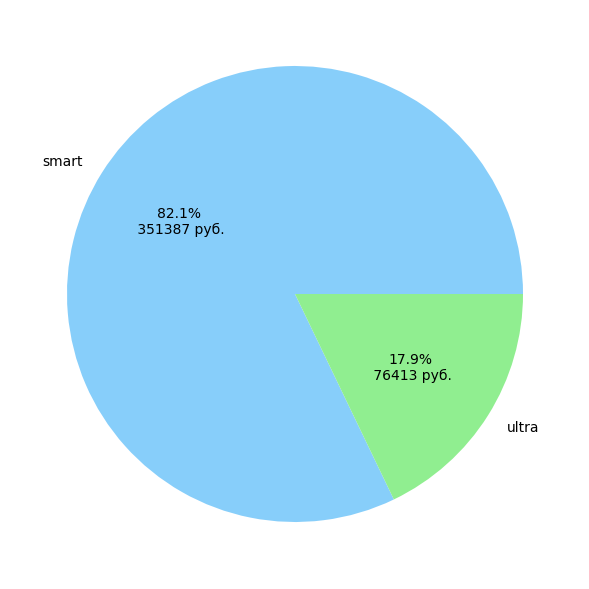

In [102]:
fig, ax = plt.subplots(figsize=[16, 6], tight_layout=True)
ax.pie([sm_rev, ul_rev], labels=['smart', 'ultra'], colors=['lightskyblue', 'lightgreen'],
       autopct=lambda p:f'{p:.1f}%\n {p*sum(values)/100 :.0f} руб.')
ax2.legend()

In [103]:
y = (sm_rev-ul_rev)*100/sm_rev
print(f"Общая выручка тарифа 'smart' на {y:.0f} % больше чем у 'ultra'")

Общая выручка тарифа 'smart' на 78 % больше чем у 'ultra'


<u><font size="+1"><b>Вывод по выручке:</b></u><a name="Вывод_по_выручке"></a>

Общая выручка тарифа 'smart' за год составила 1,96 млн. руб на 78 % больше чем у 'ultra' - 427 тыс. руб.

Для тарифа `smart` подавляющее количество выручки (1,45 млн. руб. или 74,1 % всей выручки тарифа) определяет доплата за интернет трафик, что связано с слишком низким лимитом для тарифа.

Для тарифа `ultra` 68 % выручки (290 тыс. руб.) определяет плата за базовую стоимость тарифа, а остальные 32 % (137 тыс. руб.) доплата за интернет трафик. Звонки и СМС не принесли никакого дохода, т.к. абоненты не превышали лимитов по этим услугам.

## <u>3.5) Сравнение тарифов<a name="3.5"></a>

In [104]:
tbl = pd.DataFrame({' ': ['smart', 'ultra'],
                    'Кол-во абонентов': [sm_N_users, ul_N_users],
                    'Базовая выручка': [sm_base_revenue, ul_base_revenue],
                    'Выручка за допы': [sm_calls_revenue + sm_sms_revenue + sm_GB_revenue,
                                        ul_calls_revenue + ul_sms_revenue + ul_GB_revenue],
                    'Допы за звонки': [sm_calls_revenue, ul_calls_revenue],
                    'Допы за СМС': [sm_sms_revenue, ul_sms_revenue],
                    'Допы за интернет': [sm_GB_revenue, ul_GB_revenue]
                   })
tbl

,,Кол-во абонентов,Базовая выручка,Выручка за допы,Допы за звонки,Допы за СМС,Допы за интернет
0,smart,351,193050,1774201,278217,38784,1457200
1,ultra,149,290550,137250,0,0,137250


Наибольную выручку компании приносят поступления от превышения лимита за интернет.

## <u>4) Проверка гипотез<a id="4"></a>
<font size="2">([к содержанию](#0))</font><br/>

**Первая гипотеза**

Первая гипотеза которую нужно проверить - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Уровень значимости $\alpha$ выберем 5%.

* H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;
* H1 - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.

Распределение ежемесячных выручек для каждого пользователя каждого тарифа

In [105]:
sm_dur_sms = pd.merge(sm_durr.drop('tariff', axis=1).groupby(['user_id', 'month'], as_index=False).sum(),
                      sm_sms.groupby(['user_id', 'month'], as_index=False).count(), on=['user_id', 'month'],
                      how='outer')

sm_gb = sm_internet.drop(['tariff', 'id'], axis=1)
sm_gb['gb'] = np.ceil(sm_gb['mb_used']/1000).astype('int')
sm_gb = sm_gb.drop('mb_used', axis=1)

sm_tot = pd.merge(sm_dur_sms, sm_gb.groupby(['user_id', 'month'], as_index=False).sum(),
                  on=['user_id', 'month'], how='outer').fillna(0)

sm_tot['rev_base'] = 550
sm_tot['rev_dur'] = np.where(sm_tot['duration'] > 500, (sm_tot['duration'] - 500) * 3, 0)
sm_tot['rev_sms'] = np.where(sm_tot['sms_id'] > 50, (sm_tot['sms_id'] - 50) * 3, 0)
sm_tot['rev_gb'] = np.where(sm_tot['gb'] > 15, (sm_tot['gb'] - 15) * 200, 0)
sm_tot['rev_tot'] = sm_tot['rev_base'] + sm_tot['rev_dur'] + sm_tot['rev_sms'] + sm_tot['rev_gb']
sm_tot

,user_id,month,duration,sms_id,gb,rev_base,rev_dur,rev_sms,rev_gb,rev_tot
0,1001,11,430.0,0.0,47.0,550,0.0,0.0,6400.0,6950.0
1,1001,12,414.0,0.0,35.0,550,0.0,0.0,4000.0,4550.0
2,1002,6,117.0,4.0,27.0,550,0.0,0.0,2400.0,2950.0
3,1002,7,214.0,11.0,45.0,550,0.0,0.0,6000.0,6550.0
4,1002,8,289.0,13.0,50.0,550,0.0,0.0,7000.0,7550.0
...,...,...,...,...,...,...,...,...,...,...
2224,1498,10,247.0,42.0,50.0,550,0.0,0.0,7000.0,7550.0
2225,1499,9,70.0,11.0,5.0,550,0.0,0.0,0.0,550.0
2226,1499,10,449.0,48.0,44.0,550,0.0,0.0,5800.0,6350.0
2227,1499,11,612.0,59.0,41.0,550,336.0,27.0,5200.0,6113.0


In [106]:
ul_dur_sms = pd.merge(ul_durr.drop('tariff', axis=1).groupby(['user_id', 'month'], as_index=False).sum(),
                      ul_sms.groupby(['user_id', 'month'], as_index=False).count(), on=['user_id', 'month'],
                      how='outer')

ul_gb = ul_internet.drop(['tariff', 'id'], axis=1)
ul_gb['gb'] = np.ceil(ul_gb['mb_used']/1000).astype('int')
ul_gb = ul_gb.drop('mb_used', axis=1)

ul_tot = pd.merge(ul_dur_sms, ul_gb.groupby(['user_id', 'month'], as_index=False).sum(),
                  on=['user_id', 'month'], how='outer').fillna(0)

ul_tot['rev_base'] = 550
ul_tot['rev_dur'] = np.where(ul_tot['duration'] > 500, (ul_tot['duration'] - 500) * 3, 0)
ul_tot['rev_sms'] = np.where(ul_tot['sms_id'] > 50, (ul_tot['sms_id'] - 50) * 3, 0)
ul_tot['rev_gb'] = np.where(ul_tot['gb'] > 15, (ul_tot['gb'] - 15) * 200, 0)
ul_tot['rev_tot'] = ul_tot['rev_base'] + ul_tot['rev_dur'] + ul_tot['rev_sms'] + ul_tot['rev_gb']
ul_tot

,user_id,month,duration,sms_id,gb,rev_base,rev_dur,rev_sms,rev_gb,rev_tot
0,1000,5,159.0,22.0,4.0,550,0.0,0.0,0.0,550.0
1,1000,6,172.0,60.0,49.0,550,0.0,30.0,6800.0,7380.0
2,1000,7,340.0,75.0,28.0,550,0.0,75.0,2600.0,3225.0
3,1000,8,408.0,81.0,27.0,550,0.0,93.0,2400.0,3043.0
4,1000,9,466.0,57.0,26.0,550,0.0,21.0,2200.0,2771.0
...,...,...,...,...,...,...,...,...,...,...
980,1495,8,92.0,13.0,5.0,550,0.0,0.0,0.0,550.0
981,1495,9,813.0,82.0,70.0,550,939.0,96.0,11000.0,12585.0
982,1495,10,1030.0,82.0,58.0,550,1590.0,96.0,8600.0,10836.0
983,1495,11,954.0,79.0,73.0,550,1362.0,87.0,11600.0,13599.0


(None, <matplotlib.legend.Legend at 0x216bb819a90>)

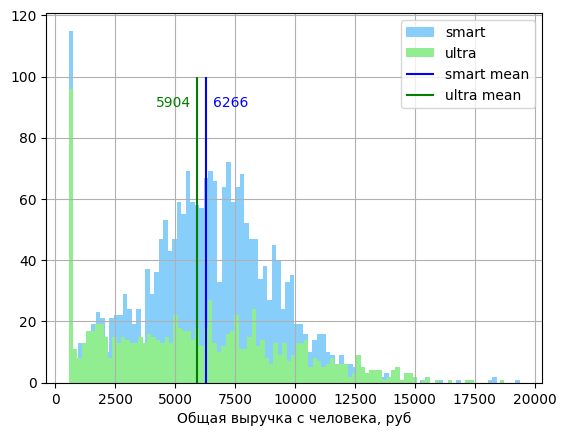

In [107]:
fig, ax = plt.subplots()
ax.hist(sm_tot['rev_tot'], color = 'lightskyblue', label='smart', bins=100)
ax.hist(ul_tot['rev_tot'], color = 'lightgreen', label='ultra', bins=100)
sm_mean = sm_tot['rev_tot'].mean()
ul_mean = ul_tot['rev_tot'].mean()
ax.vlines(sm_mean, 0, 100, label='smart mean', color='blue')
ax.text(sm_mean+300, 90, s=f'{sm_mean:.0f}', color='blue')  # x, y
ax.vlines(ul_mean, 0, 100, label='ultra mean', color='green')
ax.text(ul_mean-1700, 90, s=f'{ul_mean:.0f}', color='green')  # x, y
ax.set_xlabel('Общая выручка с человека, руб')
ax.grid(), ax.legend()

Выполним статистический тест:

In [108]:
results = st.ttest_ind(sm_tot['rev_tot'], ul_tot['rev_tot'], equal_var=False)
print('p-value:', results.pvalue)

p-value: 0.007936766210924233


p-value гораздо меньше определенного нами порогового значения в 5% => средняя выручка пользователей тарифов смарт и ульра значимо отличаются друг от друга.

**Вторая гипотеза**

Вторая гипотеза для проверки звучит так - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Уровень значимости $\alpha$ выберем 5%.

* Н0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;
* Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Распределение выручек c каждого пользователя для Москвы и регионов

In [109]:
sm = sm_tot.groupby('user_id', as_index=False)['rev_tot'].mean()
ul = ul_tot.groupby('user_id', as_index=False)['rev_tot'].mean()
rev = pd.concat([sm, ul], axis=0).fillna(0)
rev_cities = pd.merge(rev, users[['user_id', 'city']], on=['user_id'], how='outer')
rev_cities

,user_id,rev_tot,city
0,1000,3096.500000,Краснодар
1,1001,5750.000000,Москва
2,1002,6092.857143,Стерлитамак
3,1003,2781.000000,Москва
4,1004,5197.000000,Новокузнецк
...,...,...,...
495,1495,9243.000000,Иркутск
496,1496,9412.583333,Вологда
497,1497,4661.666667,Челябинск
498,1498,7209.000000,Владикавказ


In [110]:
moscow = rev_cities.loc[rev_cities['city'] == 'Москва']
region = rev_cities.loc[rev_cities['city'] != 'Москва'].fillna(0)

(None, <matplotlib.legend.Legend at 0x216b8f73500>)

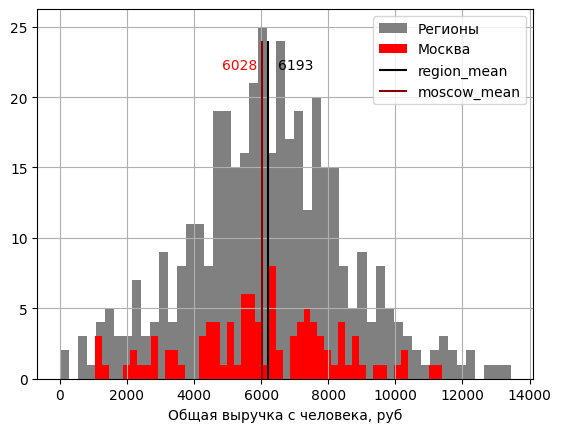

In [111]:
fig, ax = plt.subplots()
ax.hist(region['rev_tot'], color = 'gray', label='Регионы', bins=50)
ax.hist(moscow['rev_tot'], color = 'red', label='Москва', bins=50)
region_mean = region['rev_tot'].mean()
moscow_mean = moscow['rev_tot'].mean()
ax.vlines(region_mean, 0, 24, label='region_mean', color='black')
ax.text(region_mean+300, 22, s=f'{region_mean:.0f}', color='black')  # x, y
ax.vlines(moscow_mean, 0, 24, label='moscow_mean', color='darkred')
ax.text(moscow_mean-1200, 22, s=f'{moscow_mean:.0f}', color='red')  # x, y
ax.set_xlabel('Общая выручка с человека, руб')
ax.grid(), ax.legend()

Проводим статистический тест:

In [112]:
results = st.ttest_ind(moscow['rev_tot'], region['rev_tot'], equal_var=False)
print('p-value:', results.pvalue)

p-value: 0.5219462896179281


р-value значительно выше 5% => средняя выручка по Москве статистически значимо не отличается от средней выручки по другим регионам.

## <u>6) Вывод<a id="6"></a>
<font size="2">([к содержанию](#0))</font><br/>

* <b>Звонки и СМС</b>. Абсолютно всем абонентам `ultra` и подавляющему большинству абонентов `smart` хватает их пакета минут и СМС. Большинство пользователей `ultra` даже укладываются в лимит тарифа `smart` по звонкам и сообщениям.
* <b>Интернет</b>. Пользователям тарифа `smart` чаще всего не хватает включенного лимита интернет-трафика (в среднем 2 Гб) и они докупают дополнительные гигабайты трафика, а пользователи тарифа `ultra` напротив практически не выходят за пределы лимита трафика.
* <b>Выручка</b>. "Львиную долю" выручки компании приносит выручка с пользователей `smart` за дополнительные Гб интернета сверх установленного лимита (<b>1'457'200 руб за год</b>). Тариф `smart` принесит компании <b>82 % прибыли</b>.\
Для тарифа `ultra` выручка с абонентской платы составила 290'550 руб, а выручка за превышение лимитов по интернету составила 137'250 руб. Для тарифа `smart` выручка за превышение лимитов по интернету составила 1'457'200 руб, выручка за абонентскую плату составила 193'050 руб, выручка за превышение лимитов по звонкам составила 278'217 руб и выручка за превышение лимитов по СМС составила всего 38'784 руб.
* <b>Гипотезы</b>. Были проверены две статистические гипотезы. В результате было установлено, что:
    1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» <u>различается</u>
    2. Средняя выручка пользователей из Москвы <u>не отличается</u> от выручки пользователей из других регионов